## Problem Statement

### <u>Business Context</u>
#### Renewables
- <b><u>Renewable energy sources</u></b> play an increasingly important role in the <u><b>global energy mix</b></u>.<br>
- The effort to <b><u>reduce the environmental impact of energy production</u></b> is increasing.


#### Wind
- Out <b>of all the renewable energy alternatives</b>, <b><u>wind energy</b></u> is <b>one of the most developed technologies worldwide</b>.<br>
- The U.S Department of Energy has put together a 
- <b><u>guide to achieving operational efficiency</u></b>
- using predictive maintenance practices.

#### Predictive Maintenance
<b><u>Predictive maintenance</u></b> uses <b>sensor information</b> and <b>analysis methods</b> to<br> <b>measure and predict degradation and future component capability</b>.<br>
- The idea behind predictive maintenance is that:
- <b>failure patterns are predictable</b> and
- if component failure can be predicted accurately
- and the component is <b><u>replaced before it fails</u></b>,
- the <b><u>costs</u></b> of <b><u>operation and maintenance</b></u> will be much lower.

The <b><u>sensors fitted across different machines</u></b>
-  involved in the process of energy generation 
- collect data related to various <b>environmental factors</b>:
    - temperature, 
    - humidity, 
    - wind speed, etc.
- and additional <b>features related</b> to various parts of the wind turbine:
    - gearbox, 
    - tower, 
    - blades,
    - break, etc. 



## Objective
### Preamble
- <b>“ReneWind” company</b>:
    - improving machinery/processes in
    - producing wind energy
    - using machine learning. 
- collected data of generator failure of wind turbines using sensors.
- shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies).
- Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.
### Objective
<b>Objective:</b> 
- build various classification models,
- tune them,
- find the best one
- that will help identify failures 
- so that the generators could be 
- <b>repaired before failing/breaking</b>
- to <b>reduce the overall maintenance cost</b>. 
- The <u><b>nature of predictions</b></u> made by the <b><u>classification model</u></b>
- will translate as follows:

### for generator-associated Costs:
given:
* replacement >> repair >> inspection

#### confusion matrix outcomes ordered by cost:
- False negtve(FN)=real failure(no detection,model wrong,expensive=)mitigate->replacement(hi)cost
- True  positive(TP)=predicted failure=detection by model (model correct) -> repair cost (save=win)
- False pos(FP)=falseAlarm,apparent detection+no-failure,modelWrong(cheap)=(unneeded)inspection cost
- True  negative(TP)=no detection,  no failure (model correct)   -> no             cost

From above 4 lines, the purpose of this analysis is to maximize TP, minimize FN.
Recall = tp/(tp+fn)<br>
Therefore, <u><b>maximize Recall</b></u>.

in the target variables:
* “1” = “failure”
* “0” = “No failure”.

## Data Description
- data provided = transformed version of original data - collected using sensors.
- Train.csv - for training and tuning of models. 
- Test.csv - only for testing performance of the final best model.
- Both datasets comprise 40 predictor variables, 1 target variable

## Instructions
commented Jupyter IPython Notebook file
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation


## Importing necessary libraries

start pre-code

## Statistics for ML (Logistic Regression)
- detailed confusion matrix [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall#:~:text=Recall%20in%20this%20context%20is%20also%20referred%20to%20as%20the,rate%20is%20also%20called%20specificity.)
- [CoderSales/machine-learning-classification/README.md](https://github.com/CoderSales/machine-learning-classification/blob/main/README.md)

In [1]:
%pip install nb-black

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nb_black

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nb_black

In [4]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [5]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
%load_ext lab_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://pypi.org/project/nb-black/<br>
https://github.com/dnanhkhoa/nb_black/issues/19<br>
https://en.wikipedia.org/wiki/Precision_and_recall#:~:text=Recall%20in%20this%20context%20is%20also%20referred%20to%20as%20the,rate%20is%20also%20called%20specificity.<br>
https://raw.githubusercontent.com/CoderSales/machine-learning-classification/main/README.md?token=GHSAT0AAAAAABZB25MWLJANVVYH6ZBQ2H4SZBFSKRA<br>
https://github.com/CoderSales/machine-learning-classification/blob/main/README.md


In [7]:
import importlib.util
import sys
import os
import subprocess

#########################################################################################
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer  # missing value imputation

#########################################################################################
#  model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

#########################################################################################
# metric scores, and to split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    # plot_confusion_matrix,
    ConfusionMatrixDisplay,
)

#########################################################################################
# data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

#########################################################################################
# tune model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#########################################################################################
# creating pipelines, personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#########################################################################################
# supress warnings
import warnings

warnings.filterwarnings("ignore")
#########################################################################################
# make Python more structured automatically (good coding practice)
%load_ext nb_black
#########################################################################################
from statsmodels.tools.sm_exceptions import ConvergenceWarning  # legacy import

#########################################################################################
# display
pd.set_option(
    "display.max_columns", None
)  # on # Removes the limit for the number of displayed columns
# pd.set_option("display.max_rows", 200) # Sets the limit for the number of displayed rows
# suppress scientific notation for a dataframe # toggle 5 to 3
pd.set_option(
    "display.float_format", lambda x: "%.5f" % x
)  # on # set precision of floating numbers to 3 to 5 decimal points
#########################################################################################

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# To build model for prediction
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn import tree

# To get diferent metric scores
# from previous
# duplicate import from above
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split # search, implement fit and score / To split the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    StackingClassifier,
)

from xgboost import XGBClassifier

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# has SMOTE
# To help with reading and manipulation of data
from numpy import array

# To impute missing values
from sklearn.impute import SimpleImputer

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

end pre-code

In [12]:
# To tune model, get different metric scores, and split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import csv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### End of imports

#### Set up 2 display functions:

1. One called `display_full` to allow for untruncated viewing of individual cell outputs within this Jupyter notebook.
2. One called `display_arbitrary` to allow the analyst to display any arbitrary set number of rows in the output of the cell.

#### Reference:

Both of the functions described above and defined in the following two code cells are / are based upon the following code:

```
def display_full(x):
    with pd.option_context('display.max_rows', None,
                           'display.max_columns', None,
                           'display.width', 2000,
                           'display.float_format', '{:20,.2f}'.format,
                           'display.max_colwidth', None):
        display(x)
```

`display_full(x)` used in this Jupyter Notebook is a direct copy of the above code.

`display_arbitrary(x)` is slightly modified to allow the analyst to adjust the number of rows desired in the output to any arbitrary defined number.

These functions behave similarly to the `pd.head()` and `pd.tail()` pandas functions, except that `display_full(x)` allows for the full untruncated code to be printed, and `display_arbitrary(x)` allows for a set number of rows to be passed as a keyword argument: `rows=3` to set the desired number of rows to be displayed.

from this Stack Overflow Issue:

[How can I display full (non-truncated) dataframe information in HTML when converting from Pandas dataframe to HTML?](https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver)


In [14]:
def display_full(x):
    with pd.option_context('display.max_rows', None,
                           'display.max_columns', None,
                           'display.width', 2000,
                           'display.float_format', '{:20,.2f}'.format,
                           'display.max_colwidth', None):
        display(x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
def display_arbitrary(x, rows=3, columns=None):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', columns,
                           'display.width', 2000,
                           'display.float_format', '{:20,.2f}'.format,
                           'display.max_colwidth', None):
        display(x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading the dataset

Using the pandas read_csv file to load 2 comma separated variable files located in the data folder, the following two files are loaded.<br>
`Train.csv` is loaded as the training dataset to train the model.           Loaded as a Pandas Dataframe into the `df`      variable.<br>
`Test.csv` is loaded as the testing dataset to test the pre-trained model.  Loaded as a Pandas Dataframe into the `df_test` variable.<br>
This will not be used until the model is trained.<br>
This will be used to test the model.

In [16]:
df = pd.read_csv('../data/Train.csv') ##  Complete the code to read the data
df_test = pd.read_csv('../data/Test.csv') ##  Complete the code to read the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
display_arbitrary(df, rows=4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.46,-4.68,3.10,0.51,-0.22,-2.03,-2.91,0.05,-1.52,3.76,-5.71,0.74,0.98,1.42,-3.38,-3.05,0.31,2.91,2.27,4.39,-2.39,0.65,-1.19,3.13,0.67,-2.51,-0.04,0.73,-3.98,-1.07,1.67,3.06,-1.69,2.85,2.24,6.67,0.44,-2.37,2.95,-3.48,0
1,3.37,3.65,0.91,-1.37,0.33,2.36,0.73,-4.33,0.57,-0.10,1.91,-0.95,-1.26,-2.71,0.19,-4.77,-2.21,0.91,0.76,-5.83,-3.07,1.60,-1.76,1.77,-0.27,3.63,1.50,-0.59,0.78,-0.20,0.02,-1.80,3.03,-2.47,1.89,-2.30,-1.73,5.91,-0.39,0.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19998,-3.19,-10.05,5.70,-4.37,-5.35,-1.87,-3.95,0.68,-2.39,5.46,1.58,3.57,9.23,2.55,-7.04,-0.99,-9.66,1.16,3.88,3.52,-7.02,-0.13,-3.45,-4.80,-0.88,-3.81,5.42,-3.73,0.61,5.26,1.91,0.40,3.16,3.75,8.53,8.45,0.20,-7.13,4.25,-6.11,0
19999,-2.69,1.96,6.14,2.60,2.66,-4.29,-2.34,0.97,-1.03,0.50,-9.59,3.18,1.05,-1.42,-4.67,-5.41,3.72,2.89,2.33,1.46,-6.43,1.82,0.81,7.79,0.33,5.26,-4.87,-0.82,-5.67,-2.86,4.67,6.62,-1.99,-1.35,3.95,5.45,-0.46,-2.20,1.68,-1.97,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [18]:
# Checking the number of rows and columns in the training data
df.shape ##  Complete the code to view dimensions of the train data

(20000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Checking the number of rows and columns in the test data
df_test.shape ##  Complete the code to view dimensions of the test data

(5000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# let's create a copy of the training data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Displaying the first few rows of the dataset

In [22]:
# let's view the first 5 rows of the data
display_full(data.head()) ##  Complete the code to view top 5 rows of the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.46,-4.68,3.10,0.51,-0.22,-2.03,-2.91,0.05,-1.52,3.76,-5.71,0.74,0.98,1.42,-3.38,-3.05,0.31,2.91,2.27,4.39,-2.39,0.65,-1.19,3.13,0.67,-2.51,-0.04,0.73,-3.98,-1.07,1.67,3.06,-1.69,2.85,2.24,6.67,0.44,-2.37,2.95,-3.48,0
1,3.37,3.65,0.91,-1.37,0.33,2.36,0.73,-4.33,0.57,-0.10,1.91,-0.95,-1.26,-2.71,0.19,-4.77,-2.21,0.91,0.76,-5.83,-3.07,1.60,-1.76,1.77,-0.27,3.63,1.50,-0.59,0.78,-0.20,0.02,-1.80,3.03,-2.47,1.89,-2.30,-1.73,5.91,-0.39,0.62,0
2,-3.83,-5.82,0.63,-2.42,-1.77,1.02,-2.10,-3.17,-2.08,5.39,-0.77,1.11,1.14,0.94,-3.16,-4.25,-4.04,3.69,3.31,1.06,-2.14,1.65,-1.66,1.68,-0.45,-4.55,3.74,1.13,-2.03,0.84,-1.60,-0.26,0.80,4.09,2.29,5.36,0.35,2.94,3.84,-4.31,0
3,1.62,1.89,7.05,-1.15,0.08,-1.53,0.21,-2.49,0.34,2.12,-3.05,0.46,2.70,-0.64,-0.45,-3.17,-3.40,-1.28,1.58,-1.95,-3.52,-1.21,-5.63,-1.82,2.12,5.29,4.75,-2.31,-3.96,-6.03,4.95,-3.58,-2.58,1.36,0.62,5.55,-1.53,0.14,3.10,-1.28,0
4,-0.11,3.87,-3.76,-2.98,3.79,0.54,0.21,4.85,-1.85,-6.22,2.00,4.72,0.71,-1.99,-2.63,4.18,2.25,3.73,-6.31,-5.38,-0.89,2.06,9.45,4.49,-3.95,4.58,-8.78,-3.38,5.11,6.79,2.04,8.27,6.63,-10.07,1.22,-3.23,1.69,-2.16,-3.64,6.51,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# let's view the last 5 rows of the data
display_arbitrary(data_test.tail(), rows=None) ##  Complete the code to view last 5 rows of the data  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.12,1.63,1.25,4.04,3.29,-2.93,-1.33,1.75,-2.98,1.25,-6.88,3.72,-2.51,-1.39,-2.55,-2.20,4.77,2.40,3.79,0.49,-2.03,1.78,3.67,11.37,-1.98,2.25,-7.32,1.91,-3.73,-0.01,2.12,9.98,0.06,0.22,3.04,2.11,-0.56,1.94,0.51,-2.69,0
4996,-5.17,1.17,1.58,1.22,2.53,-0.67,-2.62,-2.00,0.63,-0.58,-3.67,0.46,3.32,-1.07,-7.11,-4.36,-0.00,3.70,-0.85,-0.22,-3.64,0.74,0.93,3.28,-2.28,4.46,-4.54,-1.35,-1.78,0.35,-0.21,4.42,2.60,-2.15,0.92,2.16,0.47,0.47,2.20,-2.38,0
4997,-1.11,-0.40,-1.76,-5.88,3.57,3.71,-2.48,-0.31,-0.92,-3.00,-0.11,-1.98,-1.62,-0.95,-2.74,-0.81,0.61,8.15,-9.20,-3.87,-0.30,1.47,2.88,2.79,-1.14,1.20,-4.34,-2.87,4.12,4.20,3.47,3.79,7.48,-10.06,-0.39,1.85,1.82,-1.25,-1.26,7.47,0
4998,-1.70,0.61,6.22,-0.10,0.96,-3.28,-1.63,-0.10,1.39,-1.07,-7.97,2.26,3.13,-0.49,-3.50,-4.56,3.14,2.54,-0.79,4.40,-4.07,-0.04,-2.37,-1.54,2.91,3.21,-0.17,-1.54,-4.72,-5.53,1.67,-4.10,-5.95,0.55,-1.57,6.82,2.14,-4.04,3.44,0.58,0
4999,-0.60,0.96,-0.72,8.23,-1.82,-2.28,-2.57,-1.04,4.13,-2.73,-3.29,-1.67,0.46,-1.65,-5.26,-7.99,6.48,0.23,4.96,6.75,-6.31,3.27,1.90,3.27,-0.64,-0.92,-6.76,2.99,-0.81,3.50,-8.43,2.37,-1.06,0.79,4.95,-7.44,-0.07,-0.92,-2.29,-5.36,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking the data types of the columns for the dataset

In [24]:
# let's check the data types of the columns in the dataset
data.info(verbose=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import io
buffer = io.StringIO()
data.info(buf=buffer)
s = buffer.getvalue()
with open("data_info.txt", "w",
          encoding="utf-8") as f:  
    f.write(s)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
with open('data_info.txt') as f:
    lines = f.readlines()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

alternative way to read in from txt file,<br>
to handle delimiters

In [27]:
len(lines)

48

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
dict_line_delin = {}
with open('data_info.txt', newline = '') as lines_txt:
	line_reader = csv.reader(lines_txt, delimiter='\t')
	for i, line_txt in enumerate(line_reader):
		print(line_txt)
		if i > 2 and i < len(lines)-1:
			dict_line_delin.update({line_txt[0][5:8]:line_txt[0][len(' 0   V1      '):]})
display_arbitrary(dict_line_delin, rows=12)

["<class 'pandas.core.frame.DataFrame'>"]
['RangeIndex: 20000 entries, 0 to 19999']
['Data columns (total 41 columns):']
[' #   Column  Non-Null Count  Dtype  ']
['---  ------  --------------  -----  ']
[' 0   V1      19982 non-null  float64']
[' 1   V2      19982 non-null  float64']
[' 2   V3      20000 non-null  float64']
[' 3   V4      20000 non-null  float64']
[' 4   V5      20000 non-null  float64']
[' 5   V6      20000 non-null  float64']
[' 6   V7      20000 non-null  float64']
[' 7   V8      20000 non-null  float64']
[' 8   V9      20000 non-null  float64']
[' 9   V10     20000 non-null  float64']
[' 10  V11     20000 non-null  float64']
[' 11  V12     20000 non-null  float64']
[' 12  V13     20000 non-null  float64']
[' 13  V14     20000 non-null  float64']
[' 14  V15     20000 non-null  float64']
[' 15  V16     20000 non-null  float64']
[' 16  V17     20000 non-null  float64']
[' 17  V18     20000 non-null  float64']
[' 18  V19     20000 non-null  float64']
[' 19  V20     200

{'Col': 'Non-Null Count  Dtype  ',
 '---': '--------------  -----  ',
 'V1 ': '19982 non-null  float64',
 'V2 ': '19982 non-null  float64',
 'V3 ': '20000 non-null  float64',
 'V4 ': '20000 non-null  float64',
 'V5 ': '20000 non-null  float64',
 'V6 ': '20000 non-null  float64',
 'V7 ': '20000 non-null  float64',
 'V8 ': '20000 non-null  float64',
 'V9 ': '20000 non-null  float64',
 'V10': '20000 non-null  float64',
 'V11': '20000 non-null  float64',
 'V12': '20000 non-null  float64',
 'V13': '20000 non-null  float64',
 'V14': '20000 non-null  float64',
 'V15': '20000 non-null  float64',
 'V16': '20000 non-null  float64',
 'V17': '20000 non-null  float64',
 'V18': '20000 non-null  float64',
 'V19': '20000 non-null  float64',
 'V20': '20000 non-null  float64',
 'V21': '20000 non-null  float64',
 'V22': '20000 non-null  float64',
 'V23': '20000 non-null  float64',
 'V24': '20000 non-null  float64',
 'V25': '20000 non-null  float64',
 'V26': '20000 non-null  float64',
 'V27': '20000 non-n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
display_arbitrary(lines, rows=5)

["<class 'pandas.core.frame.DataFrame'>\n",
 'RangeIndex: 20000 entries, 0 to 19999\n',
 'Data columns (total 41 columns):\n',
 ' #   Column  Non-Null Count  Dtype  \n',
 '---  ------  --------------  -----  \n',
 ' 0   V1      19982 non-null  float64\n',
 ' 1   V2      19982 non-null  float64\n',
 ' 2   V3      20000 non-null  float64\n',
 ' 3   V4      20000 non-null  float64\n',
 ' 4   V5      20000 non-null  float64\n',
 ' 5   V6      20000 non-null  float64\n',
 ' 6   V7      20000 non-null  float64\n',
 ' 7   V8      20000 non-null  float64\n',
 ' 8   V9      20000 non-null  float64\n',
 ' 9   V10     20000 non-null  float64\n',
 ' 10  V11     20000 non-null  float64\n',
 ' 11  V12     20000 non-null  float64\n',
 ' 12  V13     20000 non-null  float64\n',
 ' 13  V14     20000 non-null  float64\n',
 ' 14  V15     20000 non-null  float64\n',
 ' 15  V16     20000 non-null  float64\n',
 ' 16  V17     20000 non-null  float64\n',
 ' 17  V18     20000 non-null  float64\n',
 ' 18  V19   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`data.info` -> read to txt -> read to `lines` var -> elements of `lines` called here

In [30]:
a=lines[0:5] 
b=['<br> . . . <br>']
c=lines[-4:-1]

print(a[:], b[:], c[:],sep='\n')

["<class 'pandas.core.frame.DataFrame'>\n", 'RangeIndex: 20000 entries, 0 to 19999\n', 'Data columns (total 41 columns):\n', ' #   Column  Non-Null Count  Dtype  \n', '---  ------  --------------  -----  \n']
['<br> . . . <br>']
[' 39  V40     20000 non-null  float64\n', ' 40  Target  20000 non-null  int64  \n', 'dtypes: float64(40), int64(1)\n']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

combine elements of output from dictionary format with lst / string format techniques:

In [31]:
a=list(dict_line_delin.values())
type(a)
a_keys=list(dict_line_delin.keys())
print(type(a_keys))
b=' . . . . . . . . . . . . . . '
# c=dict_line_delin[-4:-1]

# print(a, b, c,sep='\n')
for count, (key, val) in enumerate(zip(a_keys, a)):
    # print(count)
    if count <= 2 or count >= 39:
        print(key, ':' ,val)
    elif count == 3:
        print(b)
    elif count == 44:
        pass
    else:
        pass
    # if count>42:
        # print('count > 42: ',count) # 43

<class 'list'>
Col : Non-Null Count  Dtype  
--- : --------------  -----  
V1  : 19982 non-null  float64
 . . . . . . . . . . . . . . 
V38 : 20000 non-null  float64
V39 : 20000 non-null  float64
V40 : 20000 non-null  float64
Tar : 20000 non-null  int64  
s:  : 64(40), int64(1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking for duplicate values

In [32]:
# let's check for duplicate values in the data

display_arbitrary(data.duplicated(),rows=5) ##  Complete the code to check duplicate entries in the data

0        False
1        False
         ...  
19998    False
19999    False
Length: 20000, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# brought forward in nb
data_duplicates = data.duplicated()
display_arbitrary(data_duplicates, rows=5)

0        False
1        False
         ...  
19998    False
19999    False
Length: 20000, dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# work with duplicated() output
data_duplicates = data.duplicated()
for boolean in data_duplicates:
    if boolean == True:
        print("There are duplicate values in the data")
        break
    else:
        print("There are no duplicate values in the data")
        break

There are no duplicate values in the data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking for missing values

In [35]:
# MT_MLS2_supermarket_campaign_2_template_pre_quiz.ipynb
# let's check for missing values in the data
display_arbitrary(round(data.isnull().sum() / data.isnull().count() * 100, 2), rows=8)

V1                       0.09
V2                       0.09
V3                       0.00
V4                       0.00
                 ...         
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
missing_pre_dictionary = round(data.isnull().sum() / data.isnull().count() * 100, 2) # Note: # type(missing_pre_dictionary) = pandas.core.series.Series
display_arbitrary(missing_pre_dictionary, rows=8)

V1                       0.09
V2                       0.09
V3                       0.00
V4                       0.00
                 ...         
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Q/ What to do with `pandas.core.series.Series` returned by `missing_pre_dictionary` above?<br>
A/ Add `pandas.core.series.Series` (returned by `missing_pre_dictionary` above)<br>
    - to variable (`missing_pre_dictionary`)<br>
        then<br>
    - loop through missing values output

In [37]:
missing_values_dict = {}
missing_pre_dictionary = round(data.isnull().sum() / data.isnull().count() * 100, 2)
pre_index = missing_pre_dictionary.index # Note: # print(type(pre_index)) # <class 'pandas.core.indexes.base.Index'>
pre_idx_list = pre_index.tolist()
mpdlist = missing_pre_dictionary.to_list()
for counter, pcnt_msng in zip(pre_idx_list, mpdlist):
    if pcnt_msng > 0:
        missing_values_dict.update({counter: pcnt_msng})     
missing_values_dict    

{'V1': 0.09, 'V2': 0.09}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
display_arbitrary(round(data.isnull().sum() / data.isnull().count() * 100, 2), rows=10)

V1                       0.09
V2                       0.09
V3                       0.00
V4                       0.00
V5                       0.00
                 ...         
V37                      0.00
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

missing values for data train

In [39]:
# let's check for missing values in the data
# data.'_______' ##  Complete the code to check missing entries in the train data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
display_arbitrary(round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2),rows=8)

V1                       0.10
V2                       0.12
V3                       0.00
V4                       0.00
                 ...         
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
missing_pre_dictionary = round(data.isnull().sum() / data.isnull().count() * 100, 2)
display_arbitrary(missing_pre_dictionary, rows=8)

V1                       0.09
V2                       0.09
V3                       0.00
V4                       0.00
                 ...         
V38                      0.00
V39                      0.00
V40                      0.00
Target                   0.00
Length: 41, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

missing values for data test DONE:

Call the missing value loop function on the test data (i.e. the data_test dataset)

In [42]:
def msng_val_loop(dataset):
	missing_values_dict = {}
	missing_pre_dictionary = round(dataset.isnull().sum() / dataset.isnull().count() * 100, 2)
	pre_index = missing_pre_dictionary.index # Note: # print(type(pre_index)) # <class 'pandas.core.indexes.base.Index'>
	pre_idx_list = pre_index.tolist()
	mpdlist = missing_pre_dictionary.to_list()
	for counter, pcnt_msng in zip(pre_idx_list, mpdlist):
	    if pcnt_msng > 0:
	        missing_values_dict.update({counter: pcnt_msng})     
	missing_values_dict
	return missing_values_dict

msng_val_loop(data_test)

{'V1': 0.1, 'V2': 0.12}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

see above for missing values in data test

In [43]:
# let's check for missing values in the data
# data_test.'_______' ##  Complete the code to check missing entries in the test data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Statistical summary of the dataset

In [44]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate analysis

In [45]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid= 2
        ncols=2,
        # nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        # gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Plotting histograms and boxplots for all the variables

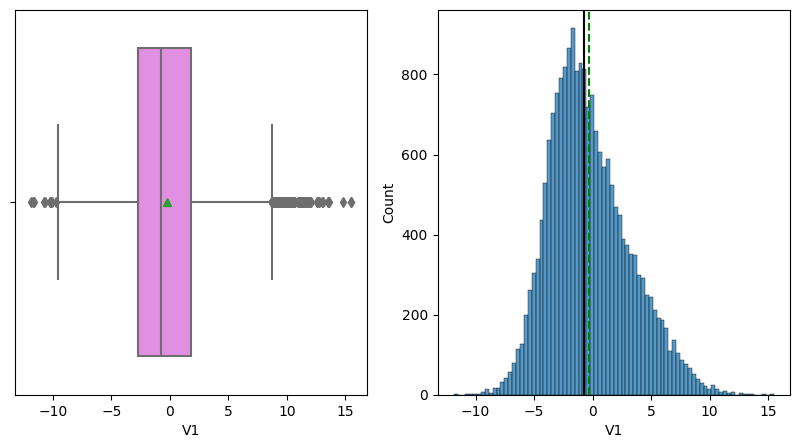

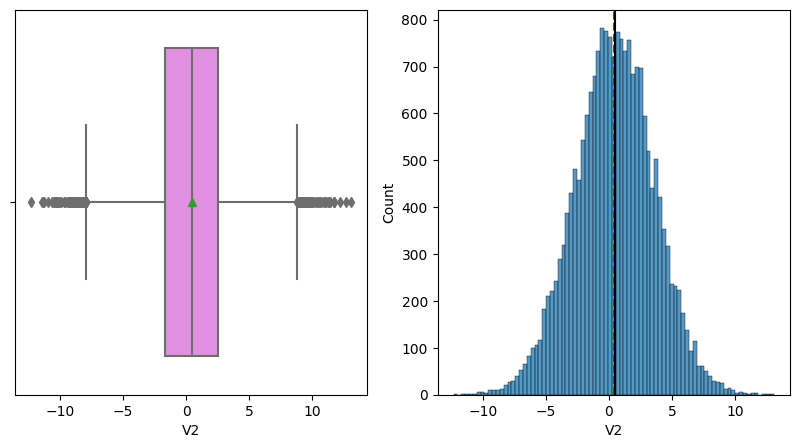

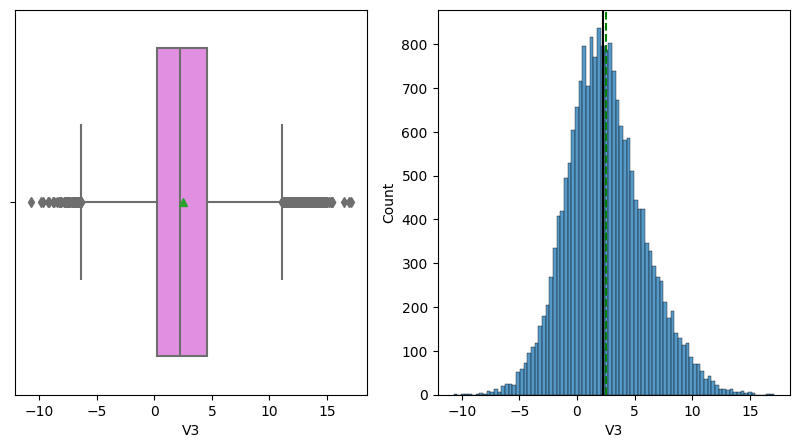

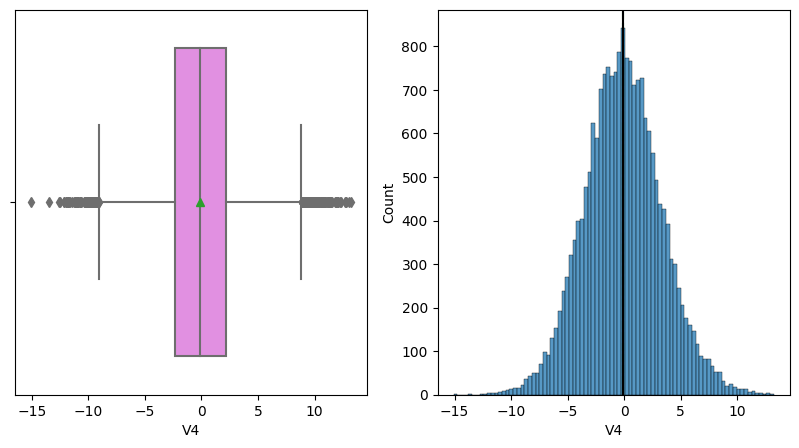

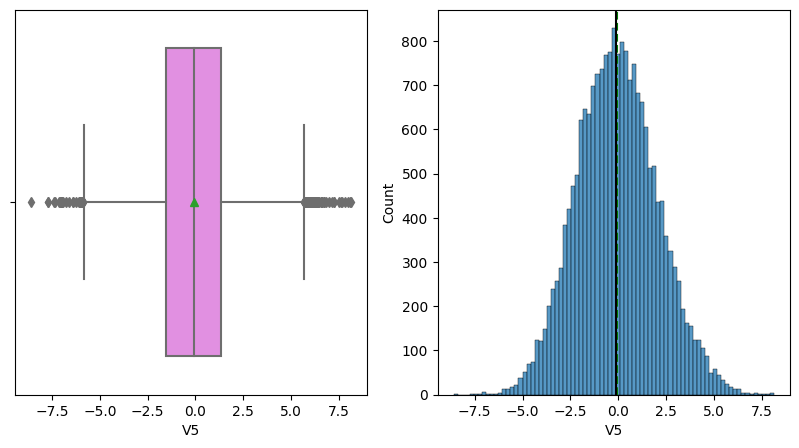

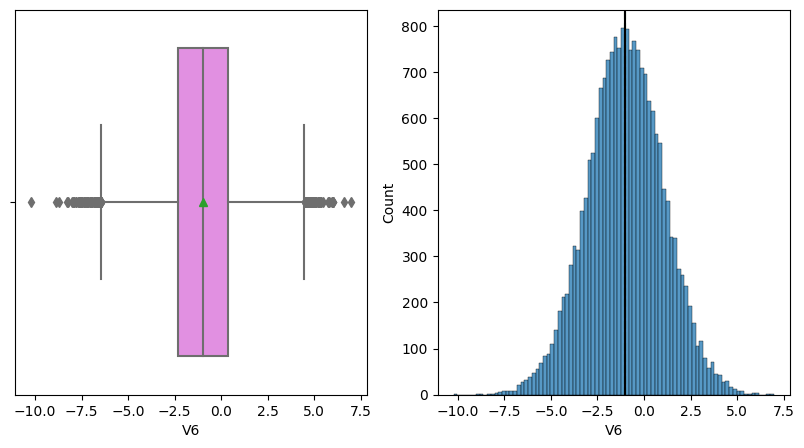

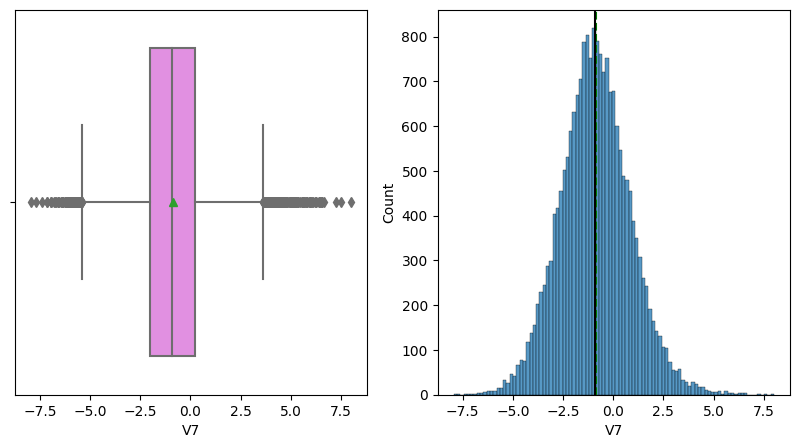

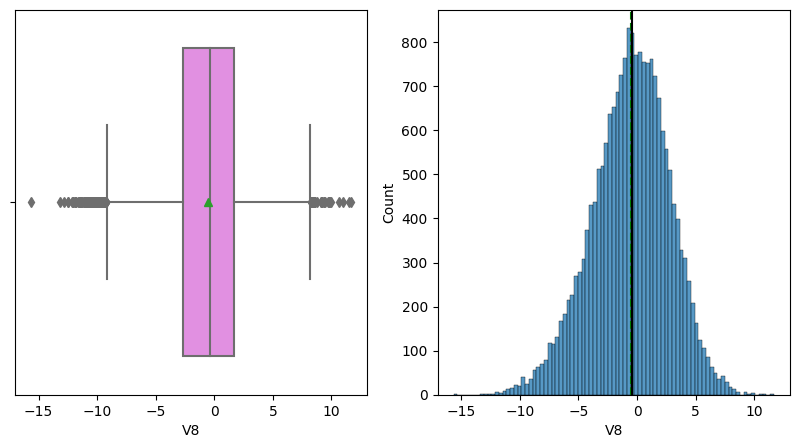

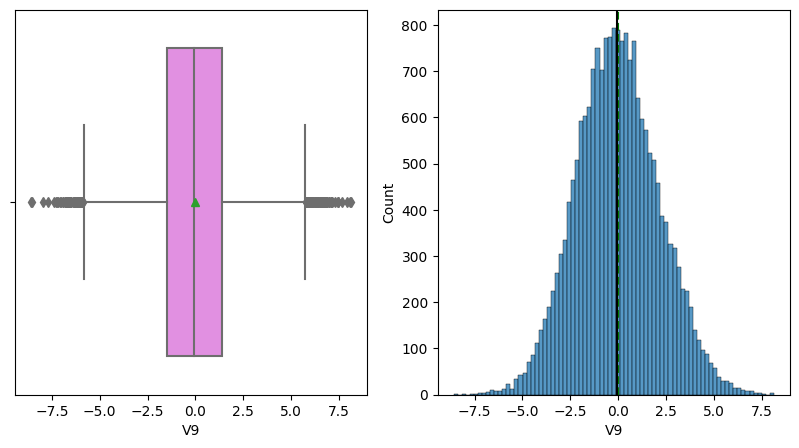

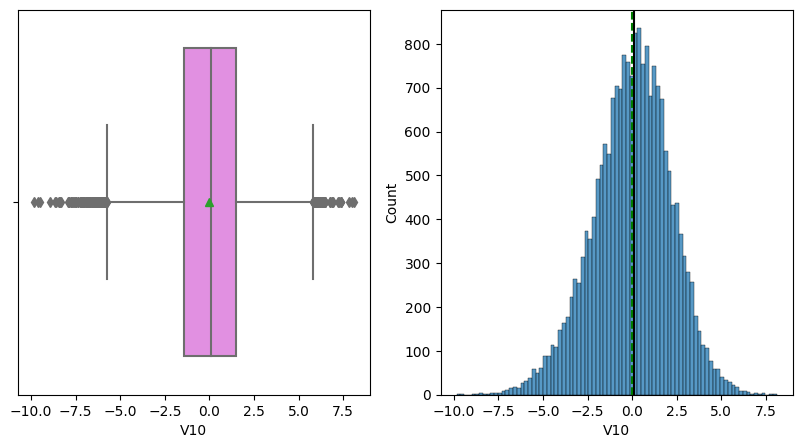

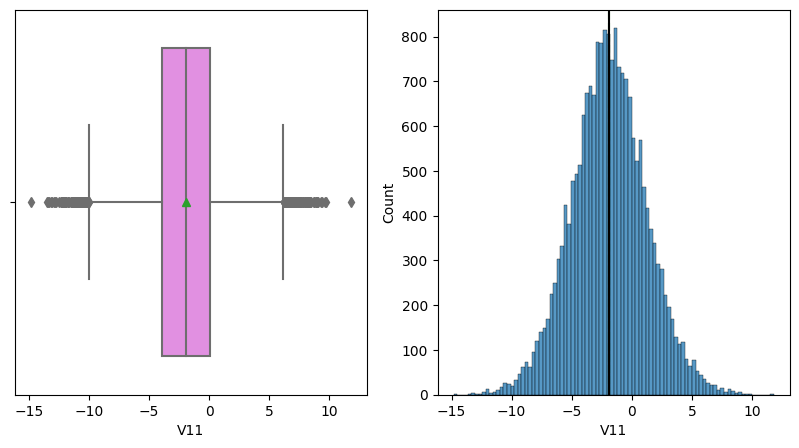

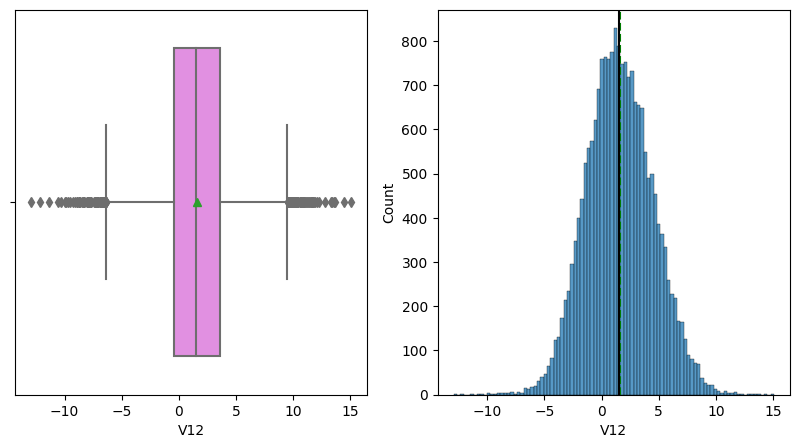

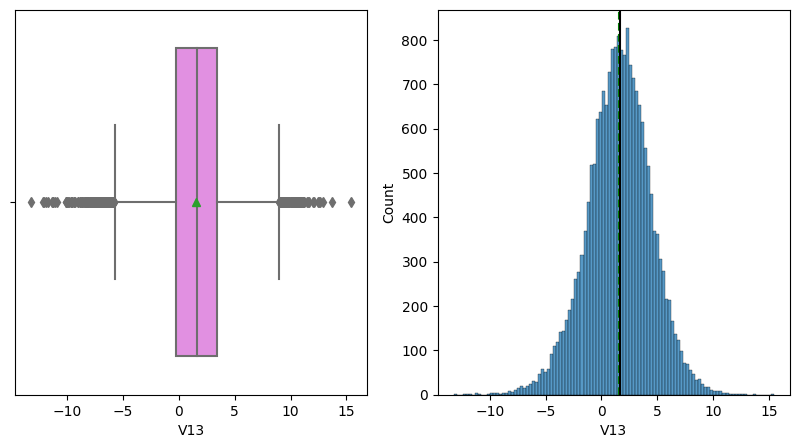

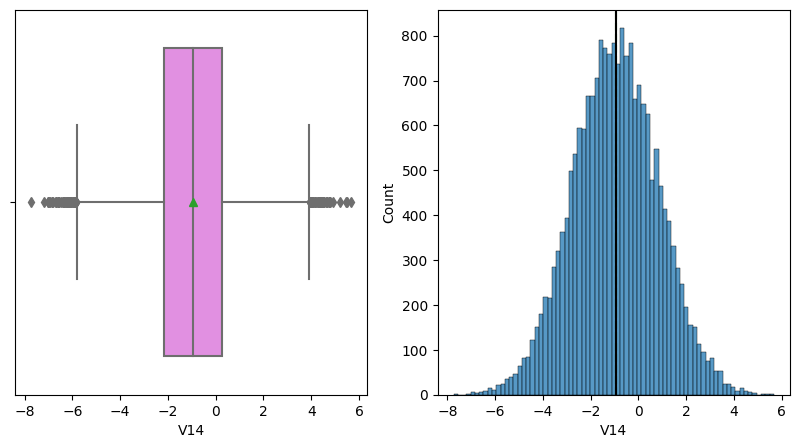

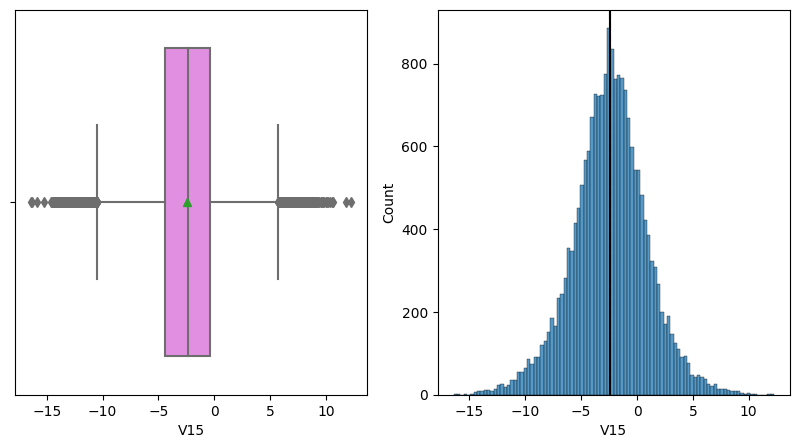

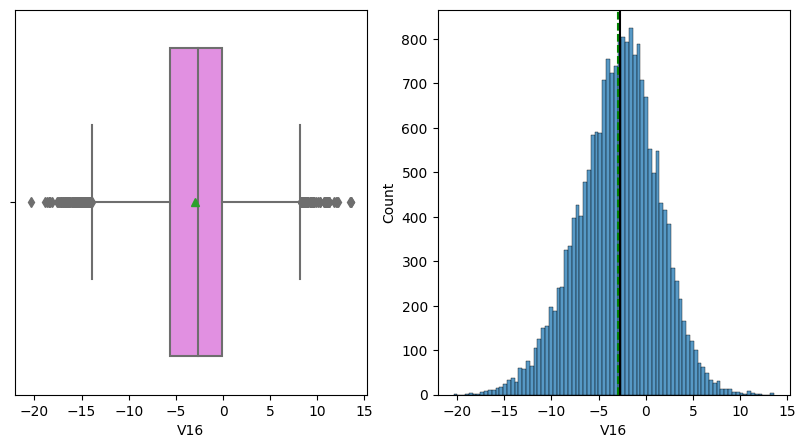

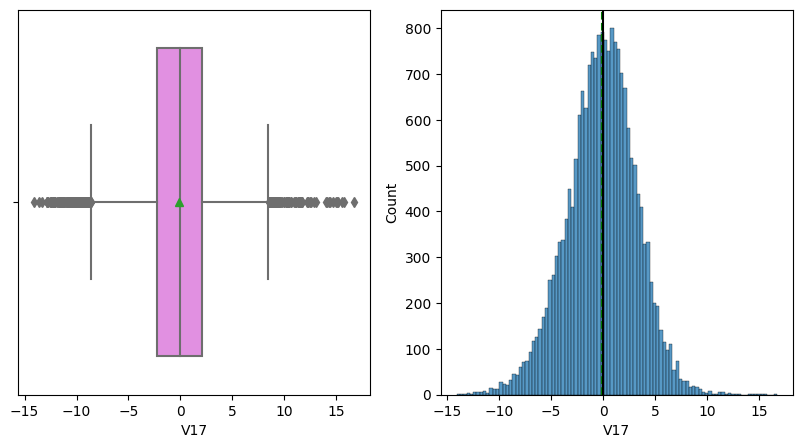

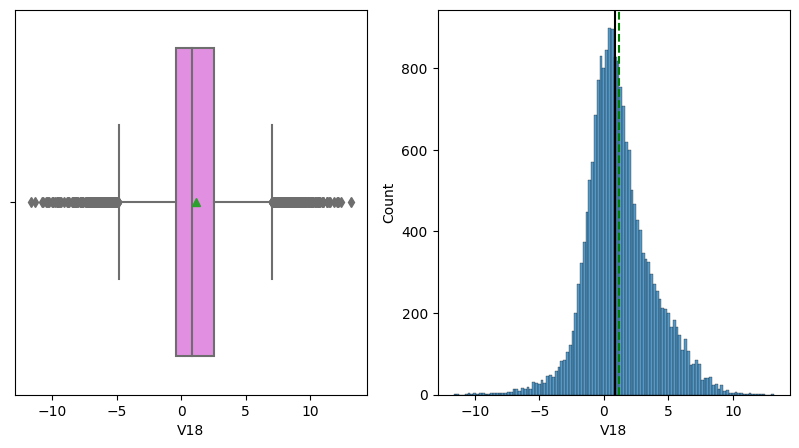

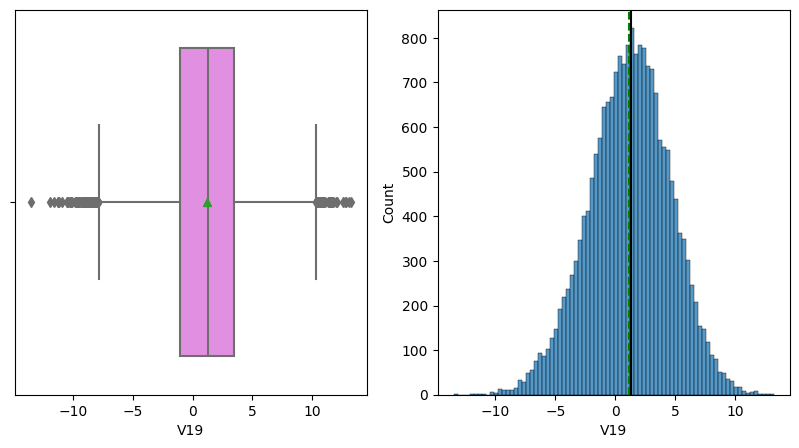

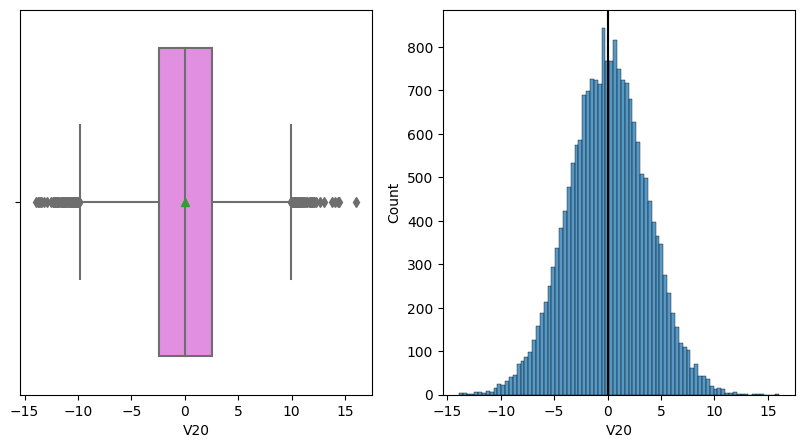

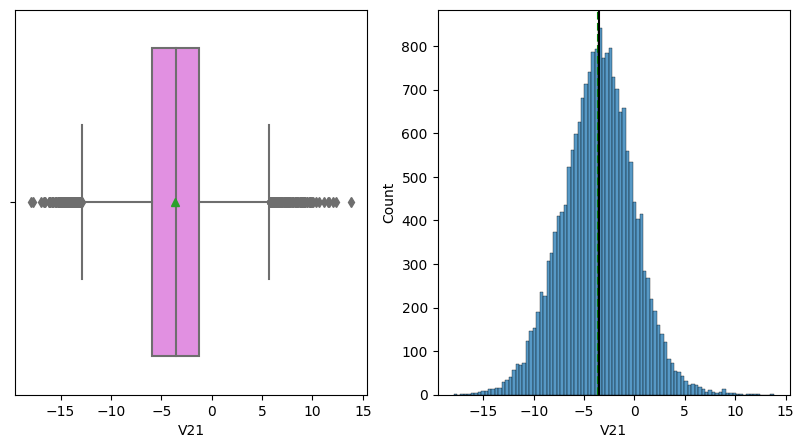

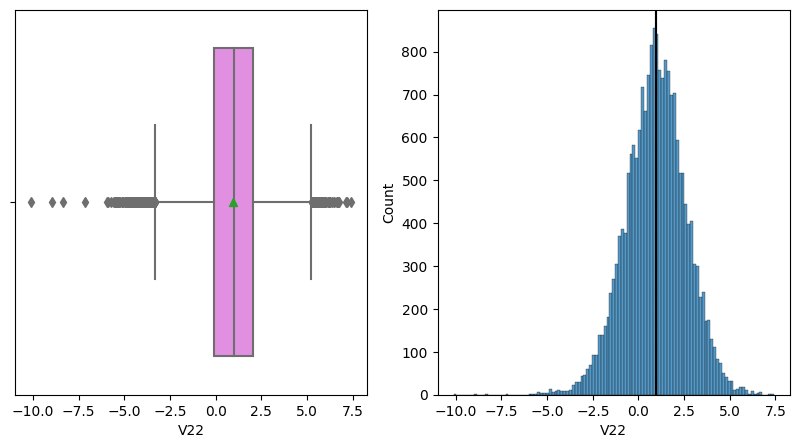

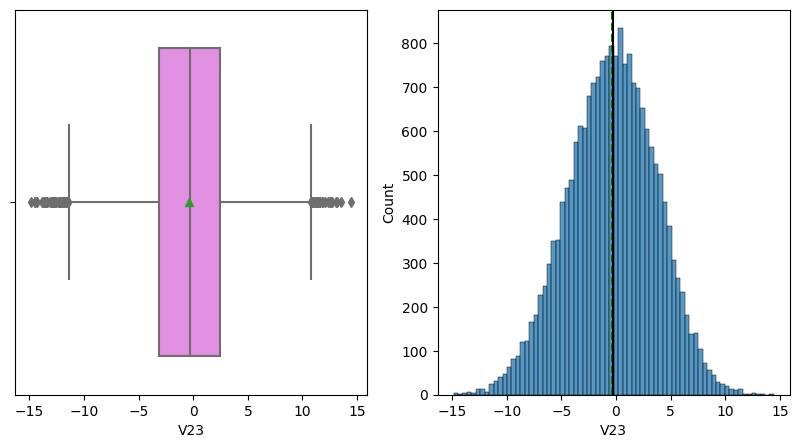

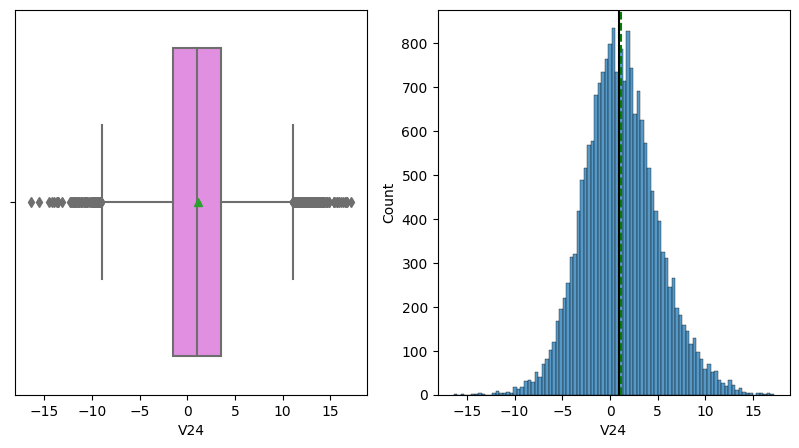

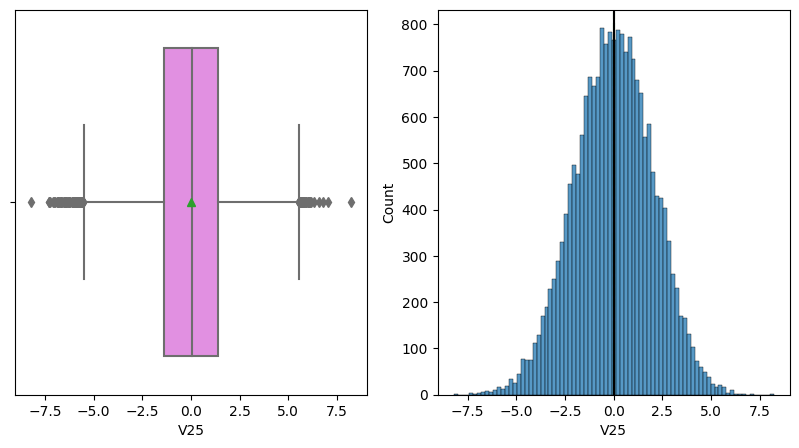

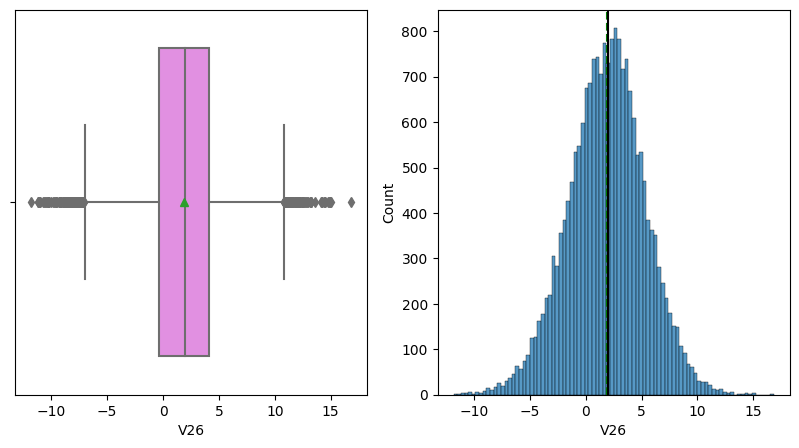

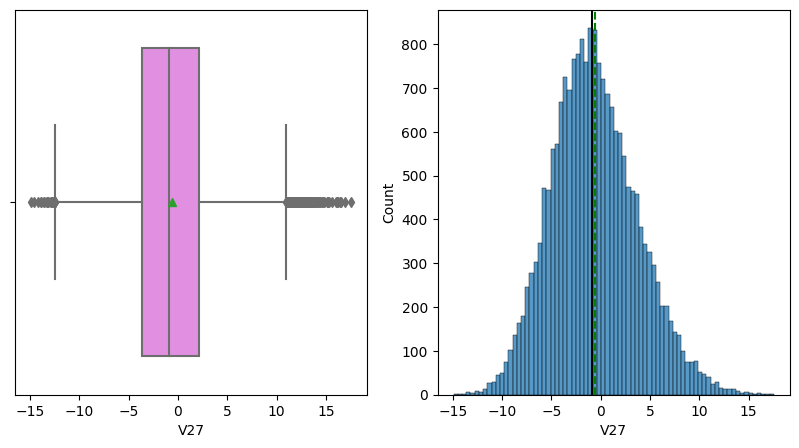

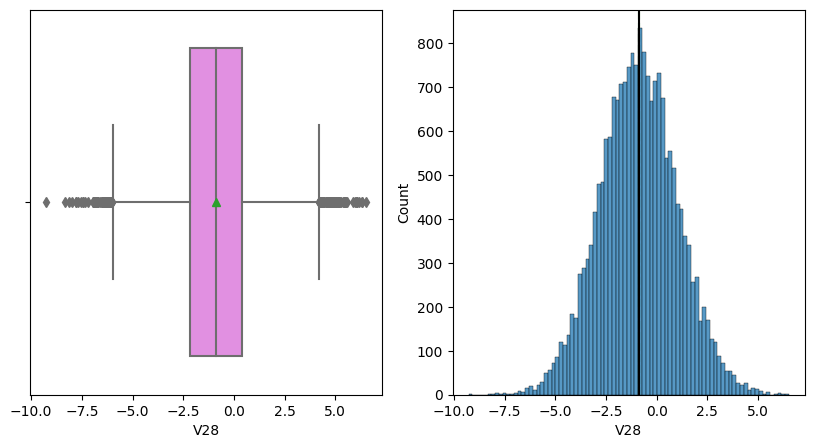

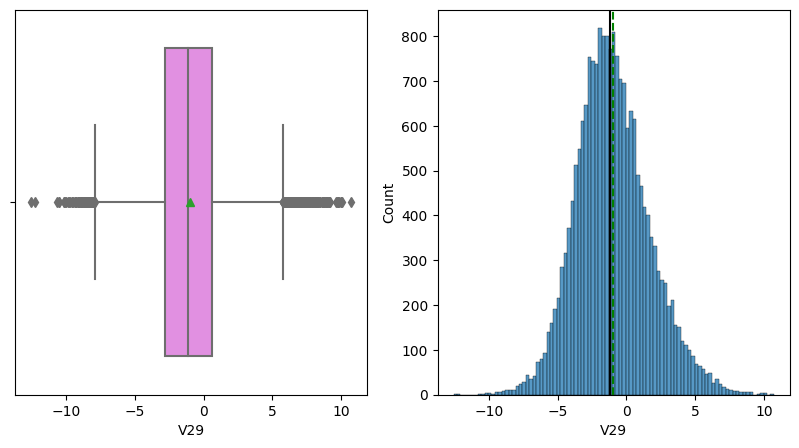

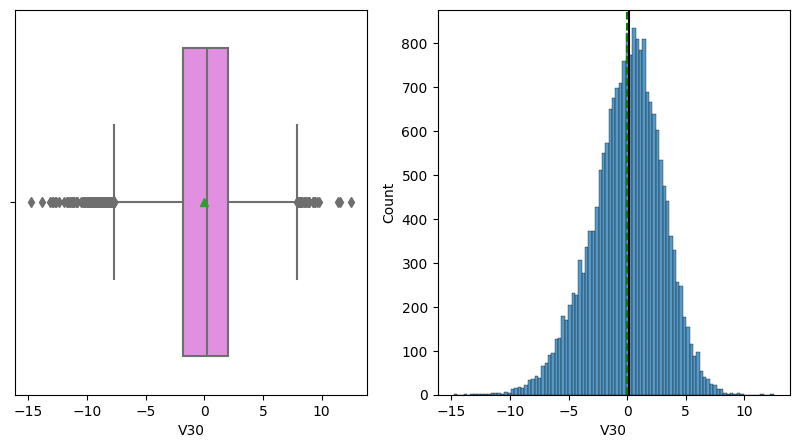

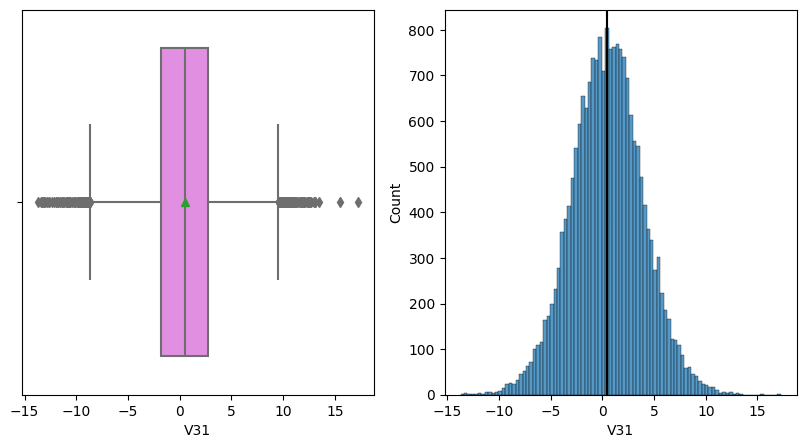

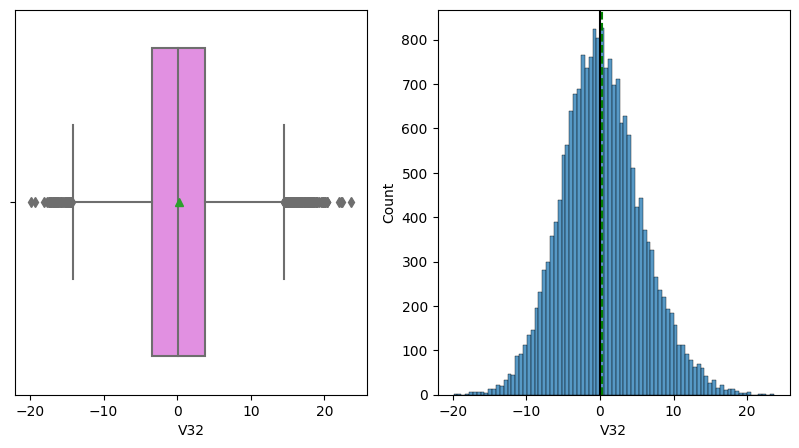

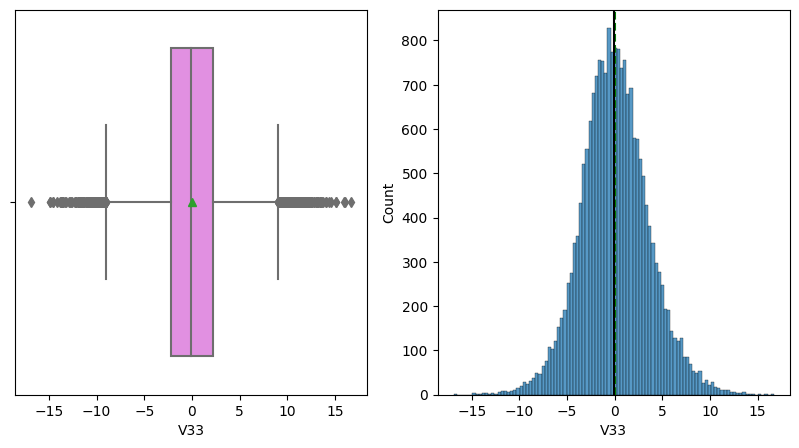

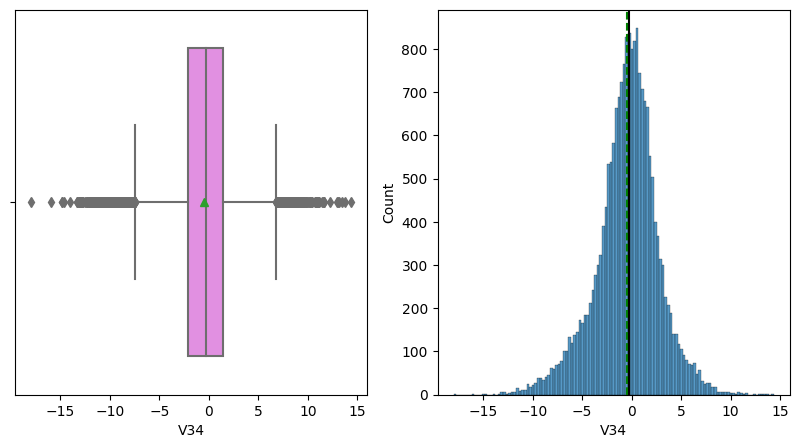

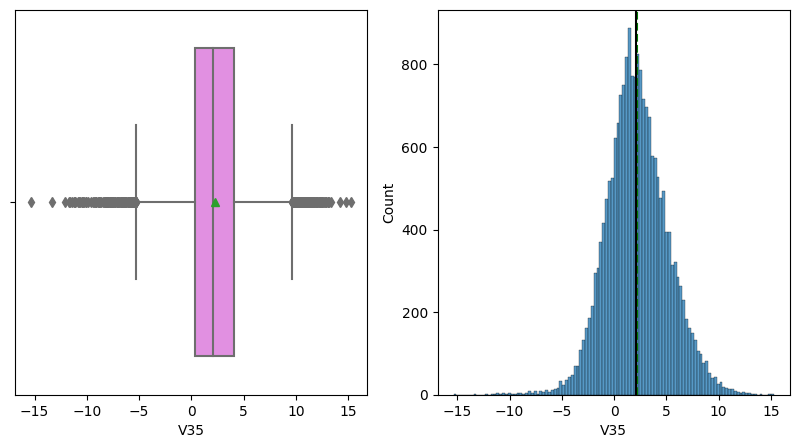

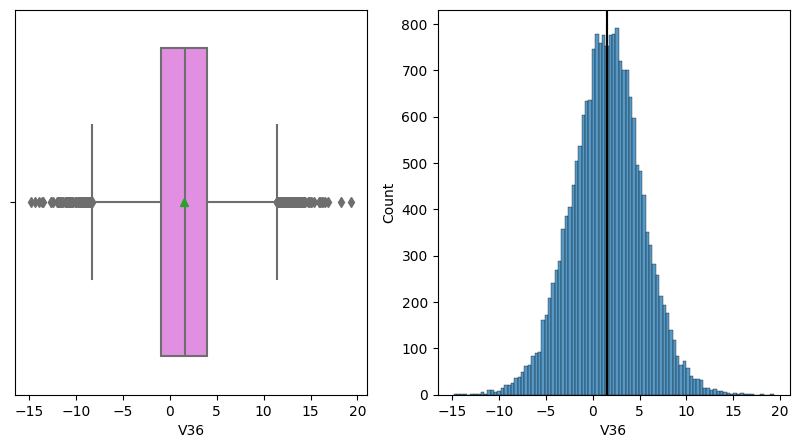

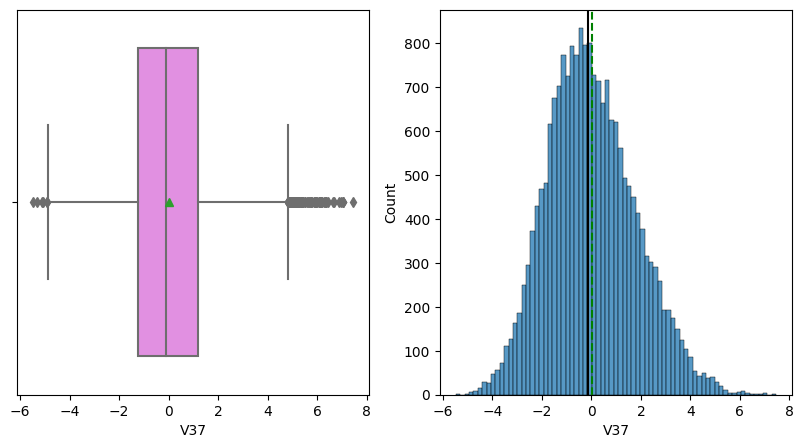

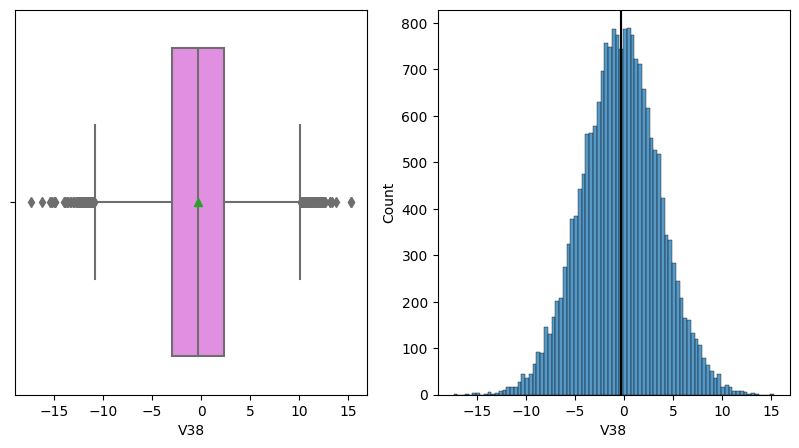

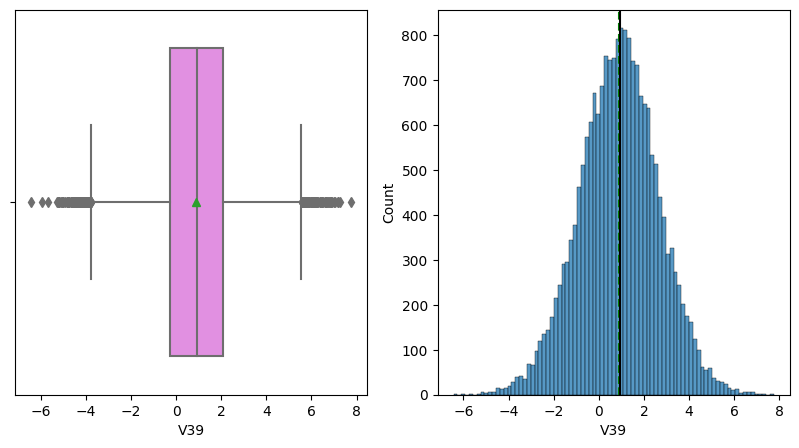

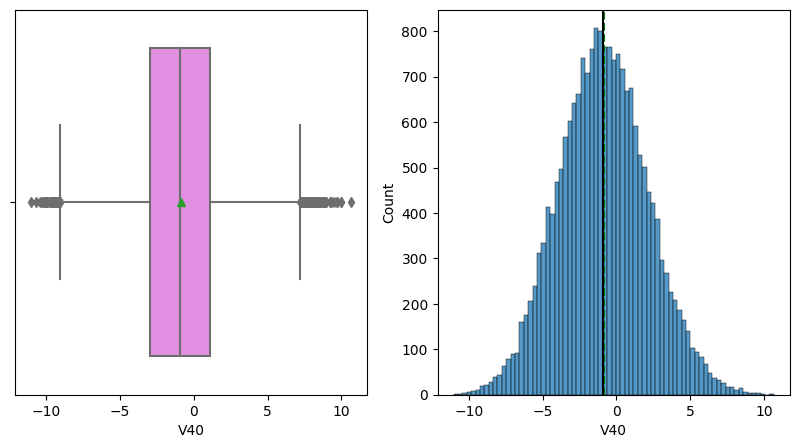

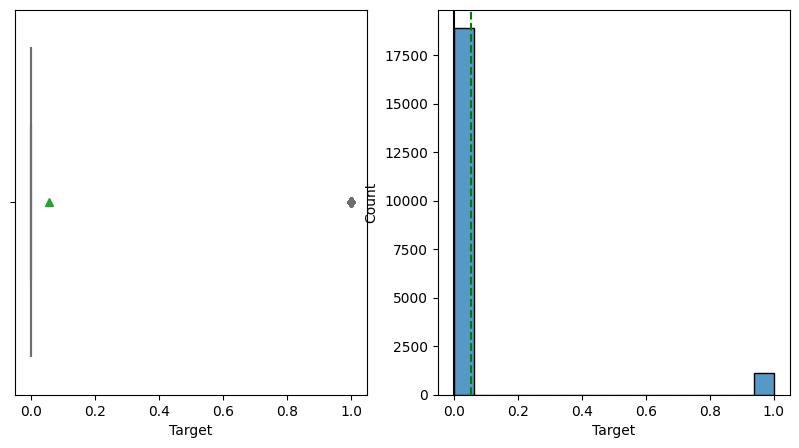

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None)

### Let's look at the values in target variable

In [47]:
data["Target"].value_counts() ##  Complete the code to check the class distribution in target variable for train data

0    18890
1     1110
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
data["Target"].value_counts(normalize=True)

0   0.945
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
data_test["Target"].value_counts() ##  Complete the code to check the class distribution in target variable for test data

0    4718
1     282
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
data_test["Target"].value_counts(normalize=True)

0   0.944
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Pre-Processing

In [51]:
# Dividing train data into X and y 
X = data.drop(["Target"], axis=1)
y = data["Target"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [52]:
# Splitting train dataset into training and validation set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) ## Complete the code to split the train dataset into train test in the ratio 75:25

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# Checking the number of rows and columns in the X_train data
X_train.shape ##  Complete the code to view dimensions of the X_train data

(15000, 40)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

split cell to see both outputs

In [54]:
# Checking the number of rows and columns in the X_val data
X_val.shape ##  Complete the code to view dimensions of the X_val data

(5000, 40)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
# Dividing test data into X_test and y_test

X_test = data_test.drop(["Target"], axis=1) ##  Complete the code to drop target variable from test data
y_test = data_test["Target"] ##  Complete the code to store target variable in y_test

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
# Checking the number of rows and columns in the X_test data
X_test.shape ##  Complete the code to view dimensions of the X_test data

(5000, 40)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Missing value imputation




In [57]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns) ## Complete the code to impute missing values in X_val without data leakage

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns) ## Complete the code to impute missing values in X_test without data leakage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

X_val.isna().sum() ## Complete the code to check the count of missing values in validation set
X_test.isna().sum() ## Complete the code to check the count of missing values in test set

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The 4 scores that will be created for the model performance classification with sklearn function above are:
- accuracy score
- recall
- precision
- F1

- accuracy score: (true positive + true negative) / (true positive + true negative + false positive + false negative)
- recall: true positive / (true positive + false negative)
- precision: true positive / (true positive + false negative)
- F1: takes both false positives and false negatives into account:
    F1 = 2 * precision * recall / (precision + recall) = 2* true positive / (2* true positive + false positive + false negative)

Reference: [F-score | F1 score](https://en.wikipedia.org/wiki/F-score)


### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [61]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

Here we are appending 6 models to a list (called models).
The models are abbreviated: Logistic regression, Bagging, GBM, Adaboost, Xgboost, dtree
The models are properly called: Logistic regression, Bagging (Booststrapping and aggregating), GBM (Gradient Boost Model), Adaboost (Adaptive Boosting Model), Xgboost (Extreme Gradient Boosting), dtree (decision tree)
We will store all the model's cross validation scores in a list called results1.


time: 4 minutes 

In [62]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
 ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.7956208065796118
dtree: 0.6982829521679532

Validation Performance:

Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8201438848920863
dtree: 0.7050359712230215


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Previous analysis repeated with original data instead of undersampled data, please see earlier discussion for definitions.

From above:

1. Extreme Gradient Boost (XGBoost) scored at 80 percent on training data, which was the best.  This shows that there is parity between how the Extreme Gradient Boost performed in both undersampling training data and original training data.

2. Bagging scored at 72 percent on training data, the second best scoring model on the original training data.
3. Gradient Boosting Model scored at 71 percent on training data, the 3rd best model in training on the original data
4. Decision Tree scored 70 percent on the original training data, the 4th best model in training on original data.
5. AdaBoost scored 63 percent on the original training dataset, the 5th best model
6. The worst model on training was Logistic Regression. Logistic regression scored 49 percent on training data.  Logistic regression performed very poorly here running on the original training set.<br>
The lower performance may be attributed to the fact that here, there is no method to deal with the fact that wind turbine failures are the minority class (1) in the data set (presented as-is) with no-predicted-failure being the majority class (0) for target variable y.


From above:

1. Extreme Gradient Boost (XGBoost) scored at 82 percent on vaidation data, which was the best.  This shows that there is parity between how the Extreme Gradient Boost performed in both undersampling validation data and original validation data.

2. Bagging scored at 73 percent on validation data, the second best scoring model on the original validation data.
3. Gradient Boosting Model scored at 72 percent on validation data, the 3rd best model in validation on the original data
4. Decision Tree scored 71 percent on the original validation data, the 4th best model in validation on original data.
5. AdaBoost scored 68 percent on the original validation dataset, the 5th best model
6. The worst model on validation was Logistic Regression. Logistic regression scored 48 percent on validation data.  Logistic regression performed very poorly here running on the original validation set.<br>
The lower performance may be attributed to the fact that here, there is no method to deal with the fact that wind turbine failures are the minority class (1) in the data set (presented as-is) with no-predicted-failure being the majority class (0) for target variable y.


In [63]:
y_train

8381     0
2462     0
14544    0
14095    0
2537     0
16693    0
2994     0
13657    0
18517    0
7407     1
18744    0
15666    0
11085    0
10674    0
12383    0
19186    0
19884    0
7135     0
3923     0
9662     0
11924    0
3433     0
10613    0
15531    0
710      0
7073     0
1378     0
14048    0
4615     0
6630     0
19061    0
13851    1
12642    0
4936     0
2756     0
3499     0
11160    0
1554     0
13068    0
11455    0
4711     0
19011    0
14348    0
15112    0
9624     0
7775     0
19119    0
12659    0
17981    0
3480     0
19032    0
14747    0
3481     0
19977    0
4530     0
15388    1
9890     0
8191     0
3259     0
5969     0
6087     0
15681    0
7890     0
13312    1
9950     0
5371     0
15106    0
18536    0
19463    0
9853     0
5946     0
19733    0
17713    0
12121    0
16101    0
18480    0
12482    0
1588     0
19710    0
15572    0
15729    0
4746     0
2755     0
10585    0
6842     0
14355    0
11166    0
11626    0
15781    0
15144    0
16352    0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
y_train.shape

(15000,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

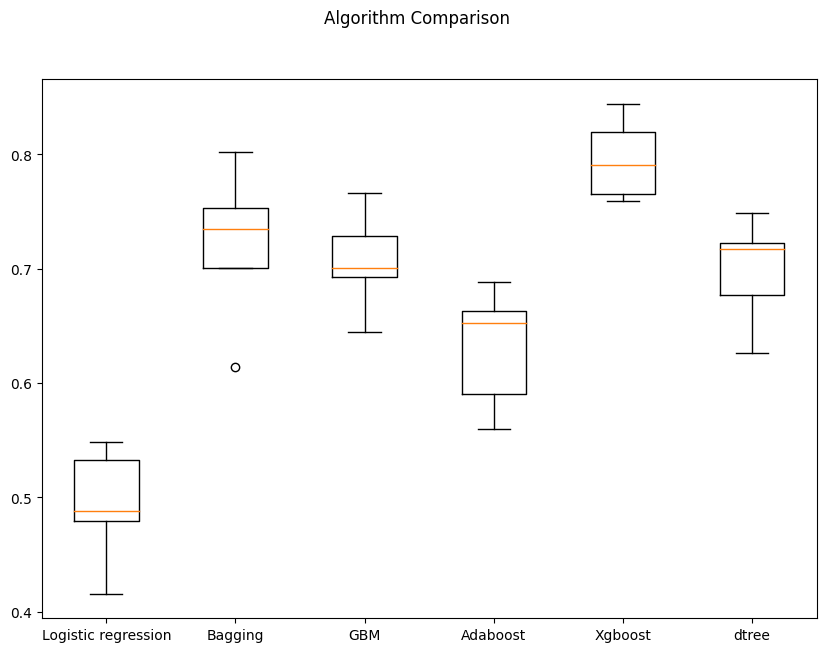

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

From the above boxplot comparing the algorithms performance on the original data (training and validation):
1. Xgboost was the best performing model.
2. Bagging was second
3. GBM was the third best
4. Decision tree was fourth best.
5. Adaboost was the 5th best.
6. Logistic regression had the lowest performance.

### Model Building with oversampled data

Here oversampling is performed to even out the disparity in the frequency of predicted-failures in the data (1, minority class) versus the number of no-failures-predicted (0, majority class).
The SMOTE algorithm imported previously, at the start of this notebook, was used.
This is an acronym for Synthetic Minority Over Sampling Technique.
The key parameter was k_neighbors of 5.

---------------------------------------------------------

The following is from the article: `SMOTE for Imbalanced Classification with Python` by Jason Brownlee at machinelearningmastery.com published on January 17, 2020 and updated on March 17, 2021.

```
- Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.
- The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

- SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

```

Reference:
- k nearest minority class neighbors [SMOTE for Imbalanced Classification with Python](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
-------------------------------------------

From imbalanced-learn.org Documentation:

```
SMOTE
- Class to perform over-sampling using SMOTE.
- k_neighborsint or object, default=5
The nearest neighbors used to define the neighborhood of samples to use to generate the synthetic samples.
```

Reference:
- [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
Reference:

In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
y_train_over

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        1
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       1
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       1
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
y_train_over.shape

(28336,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

estimated Wall time: 9 minutes

### %%time
#### Text and Code:
```
%%time is a magic command. It's a part of IPython.

%%time prints the wall time for the entire cell whereas %time gives you the time for first line only

Using %%time or %time prints 2 values:

CPU Times
Wall Time
You can read more about it in the [documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)
```

#### Reference:
- `%%time` [What does '%% time' mean in python-3?](https://stackoverflow.com/questions/49403536/what-does-time-mean-in-python-3)

##### Documentation:
- `Created `%%t` as an alias for `%%timeit`.` [ipython | %time](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)


%%time

Text and Code:

```
verbose : bool, default=False
If True, the time elapsed while fitting each step will be printed as it is completed.
```

References:
- [Using Scikit-Learn Pipelines for Data Preprocessing with Python](https://youtu.be/2_7vRKawvEU?t=2417)
- [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In this cell we are appending 6 models to the models list.
The models appended are:
Logistic regression<br>
Bagging = Bootstrapping and Aggregating <br>
GBM = Gradient Boosting Model<br>
Adaboost = Adaptive Boost<br>
Xgboost = Extreme Gradient Boost<br>
dtree = Decision Tree<br>

--------------------------------------------------

### Logistic regression

```
What is logistic regression?
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been
```

Reference:
- [IBM | What is logistic regression?](https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.)

### logit model

`In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables.`

Reference:
- [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=In%20statistics%2C%20the%20logistic%20model,one%20or%20more%20independent%20variables.)

### odds ratio
An odds ratio (OR) is a statistic that quantifies the strength of the association between two events, A and B. The odds ratio is defined as the ratio of the odds of A in the presence of B and the odds of A in the absence of B

Reference:
- [Odds ratio](https://en.wikipedia.org/wiki/Odds_ratio#Definition_and_basic_properties)

### log-odds ratio
the log of the odds ratio

References:
- [Log Odds and the Logit Function](https://www.statisticshowto.com/log-odds/#:~:text=Taking%20the%20logarithm%20of%20the,p%2F(1%2Dp)%5D)
- [Odds ratio](https://en.wikipedia.org/wiki/Odds_ratio#Definition_and_basic_properties)

### logit

```
In statistics, the logit function is the 
quantile function associated with the 
standard logistic distribution. 

- many uses in:
    - data analysis and
    - machine learning,
        - especially in data transformations.
```
Reference:
[Logit](https://en.wikipedia.org/wiki/Logit)

### standard logistic distribution. 

```
- a continuous probability distribution. 
- Its cumulative distribution function is the logistic function, 
    - which appears in logistic regression 
```

Reference:
[Logistic distribution](https://en.wikipedia.org/wiki/Logistic_distribution)

### Notes on the relevance of the above definitions:
Logistic regression is used for classification problems, typically allocating the target variable as either 0 or 1 by analysing multiple independent input variables.

estimated Wall time: 9 minutes

Wall time is the time measured by a clock on the wall as opposed to CPU time

In [69]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list

# the .append() method appends a tuple with the name Logistic regression and the model: LogisticRegression(random_state=1) to the list models.
# Then this .append() process is repeated for the other 5 models:
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
 ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")


# The for loop below loops through the tuples stored in the models list above:

for name, model in models:
    
    """
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # Reference: Documentation [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
    # Stratified K-Folds cross-validator.
    # Provides train/test indices to split data in train/test sets.
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    The following docstring is taken from the following article by Prashant Gupta:
    written on: Jun 5, 2017, entitled:
    "Cross-Validation in Machine Learning"
    
    # Cross validation:
    # Cross-Validation in Machine Learning:
    # There is always a need to validate the stability of your machine learning model. 
    # You need assurance that your model has extracted most of the patterns from the data correctly, 
    # and that its not picking up too much of the noise, 
    # that is: 
    # the model is low on bias and variance.
    
    # Validation: The process of deciding whether the numerical results quantifying hypothesized relationships between variables, are acceptable as descriptions of the data.
    # An error estimation for the model is made after training (evaluation of residuals). 
    # A numerical estimate of the difference in predicted and original responses (training error). 
    # This only tells us how well the model does on training data.
    # model may be underfitting or overfitting the data. 
    # problem with validation evaluation technique: does not indicate how well the learner will generalize to unseen test data. 
    
    # To ascertain this about the model is known as Cross Validation.

    # Hold out can be used however it suffers from high variance.
    
    # K-Fold Cross Validation
    
    # In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, 
    # such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set.
    
    # Reference: [Cross-Validation in Machine Learning](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
    """
    
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on oversampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over)## Complete the code to build models on oversampled data 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
GBM: 0.925536218591203
Adaboost: 0.8978689011775473
Xgboost: 0.989554053559209
dtree: 0.9720494245534969

Validation Performance:

Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439
dtree: 0.7769784172661871


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here are the results of Cross-Validation on the training dataset:
-----------------------------------------------------------------

From the above results printed above, it can be seen that:<br>
Logistic regression: 88 percent<br>
Bagging: 98 percent<br>
Gradient Boosting Model (GBM): 93 percent<br>
Adaboost (Adaptive Boosting): 90 percent<br>
Extreme Gradient Boosting (Xgboost): 99 percent<br>
dtree (decision tree): 97 percent

Here are the results of Validation Performance:
-----------------------------------------------------------------

From the above results printed above, it can be seen that:<br>
Logistic regression: 85 percent<br>
Bagging: 83 percent<br>
Gradient Boosting Model (GBM): 88 percent<br>
Adaboost (Adaptive Boosting): 86 percent<br>
Extreme Gradient Boosting (Xgboost): 87 percent<br>
dtree (decision tree): 78 percent

Here are the differences in results Between Cross-Validation performance on the training dataset and Validation Perfomance:
---------------------------------------------------------------------------------------------------------------------------

From getting the absolute value of the difference and rounding for the above results printed above, it can be seen that the differences are:<br>
Logistic regression: 3 percent<br>
Bagging: 15 percent<br>
Gradient Boosting Model (GBM): 5 percent<br>
Adaboost (Adaptive Boosting): 4 percent<br>
Extreme Gradient Boosting (Xgboost): 12 percent<br>
dtree (decision tree): 19 percent

Therefore, the ranking by which performs best on training data is:
1. Xgboost
2. Bagging
3. Decision Tree
4. GBM
5. Adaboost
6. Logistic Regression

The ranking of the models by perfomance on validation is:
1. GBM
2. Xgboost
3. Adaboost
4. Logistic Regression
5. Bagging
6. decision tree

Here is the ranking by least difference between training and validation:
1. Logistic regression
2. Adaboost
3. Gradient Boosting Model
4. Extreme Gradient Boosting
5. Bagging
6. Decision Tree

Gradient Boosting goes from 93 down to 88 with a low drop which means that this is the best of these first three models.

Logistic Regression has 2 scores in the high 80s with a 3 percent drop.

Bagging although scoring highly on the training data has such a large 15 percent drop that it rules this out as the best model.

AdaBoost going from 90 down to 86 with a only a 4 percent drop puts it second to Grad Boost.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Extreme Gradient Boosting although starting out the best at 99 percent on the training data has such a large drop of 12 percent to 87 percent that it's instability would rank it lower.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The fact that the decision tree started in third place on the training and performed worst in both the validation and difference, means this is the worst model.

Therefore, all things considered so far: the ranking of the models is:
1. Gradient Boosting (93-88= -5%) implies 83% in test and 78% on real data.
2. AdaBoost (90-86=-4%) implies 82% in test and 78% on real data
-----------------------
3. Logistic Regression (88-85= 3%) implies assumed to give 80% in test (this potentially could be the best due to it's high sstability.)
-----------------------------------------------------------------------
The top three exhibit high stability with little variation between training and validation data sets.

The lower three have much greater instability in going from training to validation:

-----------------------------------------------------------------------
4. Extreme Gradient Boosting (99-78 = -12%) implies assumed to give 57% in test and 45% on real data
5. Bagging (98-83%=-15%) implies assumed to give 68% in test and 53% on real data
-----------------------
6. Decision Tree (97-78=-19%) implies assumed to give 59% in test and 40% on real data
--------------------------------------------------------------------------------------------------------------------
The above hypothetical extrapolations are an estimate to simulate and slightly exaggerate losses due to instability, variance and bias when switching data sets, to accentuate the criticality of stability in the model as being of greater importance than getting a high score on the training dataset.



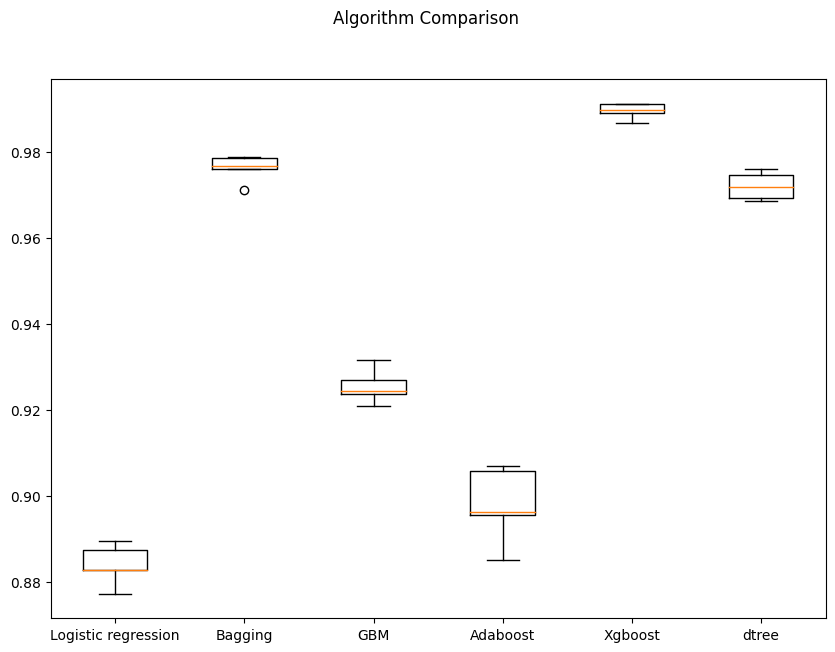

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show() ## Write the code to create boxplot to check model performance on oversampled data

In contrast to the numerical results discussed previously, the chart above seems to give a slightly different insight:
1. From the chart it would appear that the Xgboost (Extreme Gradient Boost) performs best due to high scores in both runs performed as well as a tight spread.
2. Bagging is second highest score wise in both runs and has nearly as tight a spread as the aforementioned Xgboost.
3. The decision tree comes in third with the third scores and a slightly wider spread.
------------------------------------------
As previously observed, there is a marked difference between the top three and the bottom three models.

------------------------------------------
4. The GBM (Gradient Boost Model) comes in 4th on this analysis, due to its scores in both training and validation runs being next highest.
5. As Adaboost has the next highest score, even though the spread is by far the worst of all models, this comes in 5th place.
6. Logistic Regression has a medium width Q1 to Q3 Inter Quartile Range, however, as it has the lowest scores from both runs it comes last by this analysis.

### Model Building with undersampled data

In [71]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following discussion relates to the previous code cell (Model Building with undersampled data).<br>

-----------------------------------------
The following is taken from an article: [Random Oversampling and Undersampling for Imbalanced Classification](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) by Jason Bronlee on machine learning mastery writte on January 15, 2020.

- Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.
- This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.
- One approach to addressing the problem of class imbalance is to randomly resample the training dataset. 
    - The two main approaches to randomly resampling an imbalanced dataset are: 
        
        - to delete examples from the majority class, called undersampling, and
        
        - to duplicate examples from the minority class, called oversampling.

Reference:
- [Random Oversampling and Undersampling for Imbalanced Classification](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)

-----------------------------------------



In the previous code cell, the rus variable holds the result of the following:
1. Save the the Random Undersampler method as rus
2. fit the X_train and y_train data to the rus model, and save the results of running the model to the variables: X_train_un and y_train_un

X_train_un = the undersampled X_train data
y_train_un = the undersampled y_train data

From the output of the previous code cell, the 0 (majority, no failure prediction) category result in a decrease in elements in the y variable from 14168 to 832, resulting in a balanced set between wind turbine failures (1) and no-failure-predictions (0).

There are 832+832=1664 rows in the final dataset after undersampling (as this consists of a 50:50 split between passes and failures predicted.)<br>
As there are 40 input variables V1 to V40, there are 40 columns in the dataset for X.<br>
While y is the target which is a single column.<br>
(Note: for purposes of coding, this may be treated as either a Pandas Series or a Pandas DataFrame, however, this is only a matter of switching data structures and does not change values, but makes the program run properly.)

In [72]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
 ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un)## Complete the code to build models on undersampled data 
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
GBM: 0.8990621167303946
Adaboost: 0.8666113556020489
Xgboost: 0.9074742082100858
dtree: 0.8617776495202367

Validation Performance:

Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.9028776978417267
dtree: 0.841726618705036


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

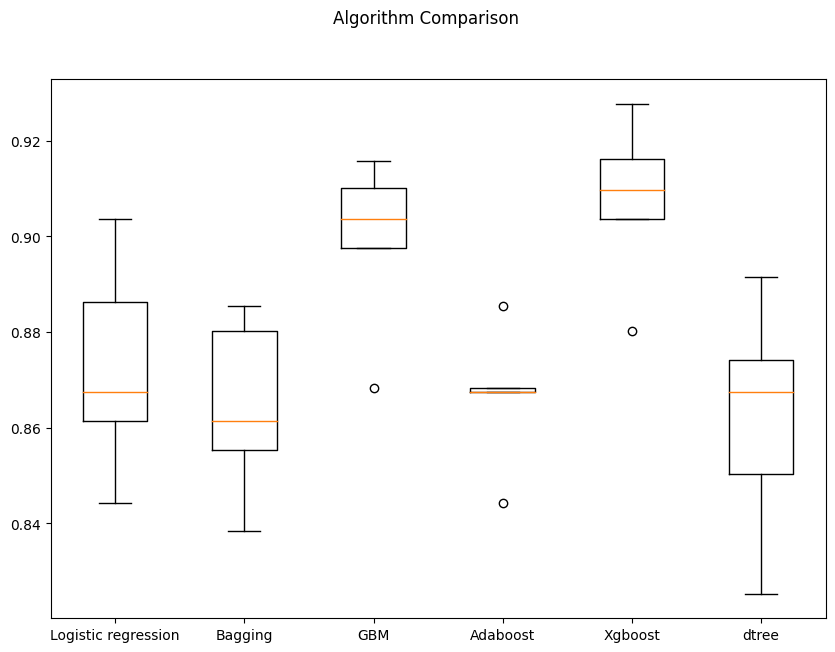

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
# Plotting boxplots for CV scores of all models defined above
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show() ## Write the code to create boxplot to check model performance on oversampled data ## Write the code to create boxplot to check model performance on undersampled data

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



### Tuning AdaBoost using oversampled data

In [74]:
%%time
# defining model:
Model = AdaBoostClassifier(random_state=1)
# Parameter grid to pass in RandomSearchCV:
param_grid = {
    "n_estimators": [200, 210],
    "learning_rate": [0.2, 0.1],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
#Calling RandomizedSearchCV:
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV:
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 210, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9730381996038723:
CPU times: total: 1min 50s
Wall time: 17min 53s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
# Creating new pipeline with best parameters:
tuned_ada = AdaBoostClassifier(
    n_estimators= 30, learning_rate= 1, base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
) ## Complete the code with the best parameters obtained from tuning
tuned_ada.fit(X_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.946,0.933,0.957,0.945


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val) ## Complete the code to check the performance on validation set
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.942,0.853,0.488,0.620


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tuning Random forest using undersampled data

estimated time: 12 seconds

In [78]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [290,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 290, 'min_samples_leaf': 1, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.8966091912560422:
CPU times: total: 1.41 s
Wall time: 9.55 s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters are {'n_estimators': 290, 'min_samples_leaf': 1, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.8966091912560422:
CPU times: total: 2.05 s
Wall time: 11.3 s

In [79]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features=0.2,
    random_state=1,
    max_samples=0.6000000000000001,
    n_estimators=150,
    min_samples_leaf=5,
)## Complete the code with the best parameters obtained from tuning

tuned_rf2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_features=0.2, max_samples=0.6000000000000001,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
display_arbitrary(X_train_un,rows=7)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,0.06,-1.47,2.87,-0.45,-0.05,-4.36,-0.35,4.85,-2.42,0.12,-7.13,6.73,-0.30,0.20,-0.10,-0.86,5.21,2.18,2.13,4.24,-3.36,2.69,3.77,4.19,2.17,-1.68,-1.55,0.49,-4.17,-1.74,2.20,1.78,-6.33,1.09,1.92,5.37,1.96,-4.45,0.65,1.12
1,5.25,-0.05,2.44,-5.13,-1.68,-0.07,1.73,0.67,-1.64,0.82,1.36,3.97,0.93,-0.46,2.43,-0.00,-3.07,-0.11,0.54,-3.38,-2.74,1.50,-0.22,-1.73,1.82,0.36,5.47,-1.98,-0.24,-1.11,3.03,-3.91,-1.59,-0.56,1.80,2.86,-0.11,-0.16,0.34,2.58
2,1.54,0.98,2.01,3.99,-2.76,-0.20,-2.00,-5.24,4.89,-0.36,0.57,-3.59,4.75,-1.20,-6.01,-8.73,-2.25,-1.03,3.71,1.56,-7.47,1.71,-3.08,-2.46,-0.45,2.43,0.68,-0.30,-0.96,1.02,-5.61,-2.05,1.15,0.74,4.53,-4.53,-1.73,0.81,0.26,-6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,3.25,3.63,2.65,1.85,-2.64,-2.26,1.53,1.40,-0.88,-1.75,3.08,6.64,2.01,-3.56,-0.60,-1.36,-0.65,-3.56,7.16,-2.19,-6.25,1.51,0.91,1.31,-1.69,3.48,-1.84,-0.84,2.78,4.40,-2.15,-0.52,1.38,0.98,7.30,-4.88,-1.24,1.67,-1.58,-2.28
1662,6.00,-3.32,-0.29,-2.06,-0.44,-0.29,0.24,6.07,-1.15,-0.63,-1.42,-3.90,-6.13,2.80,7.92,6.10,4.35,-0.59,-4.95,2.88,4.07,-0.65,0.50,-0.30,4.34,-5.59,0.98,0.21,1.47,-0.09,7.15,1.73,-1.95,-3.81,-0.02,1.09,-0.16,-8.60,-4.76,7.36
1663,0.44,-3.16,-0.33,1.54,-1.50,0.92,-1.70,-0.77,1.79,0.47,-0.19,-5.66,-2.06,1.33,0.98,-0.97,1.46,0.06,-0.89,4.24,1.20,-0.83,-3.03,-2.00,1.71,-4.18,0.47,1.39,1.09,0.84,-1.06,-1.39,0.21,0.42,0.26,-1.20,-0.20,-2.65,-1.19,-0.11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
type(X_train_un)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
display_arbitrary(y_train_un,rows=7)

0       0
1       0
2       0
       ..
1661    1
1662    1
1663    1
Name: Target, Length: 1664, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
rf2_train_perf = tuned_rf2.score(X_train_un, y_train_un) ## Complete the code to check the performance on undersampled train set
rf2_train_perf

0.953125

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
rf2_train_perf=model_performance_classification_sklearn(tuned_rf2, X_train_un, y_train_un)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.953,0.925,0.980,0.952


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
type(rf2_train_perf)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)  ## Complete the code to check the performance on validation set
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.930,0.885,0.435,0.584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
display_arbitrary(X_val,rows=5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,-3.73,-2.56,-2.89,2.15,1.10,1.06,-1.53,1.27,-1.16,1.28,1.46,-4.01,-2.19,1.62,-0.01,3.87,-0.18,-0.18,-1.19,0.68,3.97,-1.74,0.70,2.88,-2.30,-2.40,-3.71,1.04,2.32,3.81,1.37,7.49,5.07,-0.87,0.85,-1.57,-1.13,-1.15,-1.60,-1.21
1,-4.10,2.67,4.27,3.73,2.46,-3.16,-2.19,0.66,-1.56,0.31,-4.82,3.00,1.97,-2.11,-5.77,-3.27,0.84,1.13,3.57,-1.23,-5.82,0.85,1.35,8.22,-2.92,6.44,-6.95,-1.24,-2.04,1.62,3.39,9.76,3.42,-1.79,6.14,1.50,-1.69,-0.17,0.66,-3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,-5.08,-1.06,0.68,2.82,1.40,-0.42,-2.74,-1.69,0.43,0.81,-4.06,-1.80,-0.29,-0.21,-4.07,-3.83,2.17,2.92,0.64,2.87,-1.18,0.24,-0.63,3.71,-0.90,0.01,-3.93,1.22,-1.65,0.28,-1.19,3.45,1.09,0.40,0.66,1.41,0.29,0.48,1.40,-2.71
4999,1.09,1.33,2.95,-0.66,-1.52,-1.00,-0.30,0.84,-1.66,-0.99,2.28,5.09,2.23,-2.87,-2.46,-1.62,-1.96,-0.18,3.91,-2.60,-6.04,1.31,0.49,1.90,-2.00,2.96,-2.22,-2.02,3.35,5.36,0.20,1.39,4.24,-1.43,7.21,-1.56,-0.69,0.37,-0.68,-0.90


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
display_arbitrary(y_val, rows=5)

3053     1
9997     0
        ..
12442    0
18793    1
Name: Target, Length: 5000, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tuning Gradient Boosting using oversampled data

estimated Wall time 18 minutes:

In [89]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(139,142,1), "learning_rate": [0.99, 1, 1.01], "subsample":[0.79,0.8,0.81], "max_features":[0.33,0.35,0.37]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.79, 'n_estimators': 139, 'max_features': 0.35, 'learning_rate': 1} with CV score=0.9767086716914598:
CPU times: total: 20.4 s
Wall time: 17min 23s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters are {'subsample': 0.79, 'n_estimators': 139, 'max_features': 0.35, 'learning_rate': 1} with CV score=0.9767086716914598:
CPU times: total: 21.4 s
Wall time: 17min 26s

In [90]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.35,
    random_state=1,
    learning_rate=1,
    n_estimators=135,
    subsample=0.8,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.35, n_estimators=135,
                           random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
) ## Complete the code to check the performance on oversampled train set
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.996,0.995,0.996,0.996


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
) ## Complete the code to check the performance on validation set
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.971,0.849,0.698,0.766


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tuning XGBoost using oversampled data

**Note**: You can choose to skip this section if XGBoost gives error.

estimated Wall time: 37 minutes

In [93]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[249,250,251,252],'scale_pos_weight':[9,10,11], 'learning_rate':[0.14,0.15,0.16], 'gamma':[1.8,1.9,2], 'subsample':[0.79,0.8,0.81]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 249, 'learning_rate': 0.15, 'gamma': 2} with CV score=0.9959064219685274:
CPU times: total: 1min 28s
Wall time: 48min 1s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 249, 'learning_rate': 0.15, 'gamma': 2} with CV score=0.9959064219685274:
CPU times: total: 1min 29s
Wall time: 36min 45s

from running above code, here are the current parameters used:

Model = XGBClassifier(random_state=1,eval_metric='logloss')
param_grid={'n_estimators':[249,250,251],'scale_pos_weight':[8,9,10], 'learning_rate':[0.15,0.2,0.25], 'gamma':[1,2,3], 'subsample':[0.6,0.7,0.8]}
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Run 1:

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 251, 'learning_rate': 0.15, 'gamma': 2} with CV score=0.9959769935987322:
CPU times: total: 1min 32s
Wall time: 36min 39s

Run 2:

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.15, 'gamma': 1.9} with CV score=0.9959769686881673:
CPU times: total: 1min 34s
Wall time: 42min 3s

In [94]:
print(type(X_train_over))
print(type(y_train_over))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
print(X_train.shape)
print(y_train.shape)

(15000, 40)
(15000,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
y_train_over.to_frame()
display_arbitrary(y_train_over, rows=5)

0        0
1        0
        ..
28334    1
28335    1
Name: Target, Length: 28336, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters are <br>
{'subsample': 0.8, 'scale_pos_weight': 10, 
'n_estimators': 250, 'learning_rate': 0.2, '
gamma': 0} <br>
with CV score=0.995765154155294:


In [98]:
xgb2 = XGBClassifier(
    random_state=1,
    n_estimators=250,
    scale_pos_weight=9,
    subsample=0.7,
    learning_rate=0.2,
    gamma=2,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Notes:<br>
Reference: 
- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- Source code: https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/ensemble/_gb.py#L851

From running the above code:

XGBClassifier: 

The following are possible parameters available to set with default values:

loss='log_loss',<br>
learning_rate=0.1,<br>
n_estimators=100,<br>
subsample=1.0,<br>
criterion='friedman_mse',<br>
min_samples_split=2,<br>
min_samples_leaf=1,<br>
min_weight_fraction_leaf=0.0,<br>
max_depth=3,<br>
min_impurity_decrease=0.0,<br>
init=None,<br>
random_state=None,<br>
max_features=None,<br>
verbose=0,<br>
max_leaf_nodes=None,<br>
warm_start=False,<br>
validation_fraction=0.1,<br>
n_iter_no_change=None,<br>
tol=0.0001,<br>
ccp_alpha=0.0)



The following parameters are not set:

base_score=None,<br>
booster=None,<br>
callbacks=None,<br>
colsample_bylevel=None,<br>
colsample_bynode=None,<br>
colsample_bytree=None,<br>
early_stopping_rounds=None,<br>
enable_categorical=False,<br>
feature_types=None,<br>
gpu_id=None,<br>
grow_policy=None,<br>
importance_type=None,<br>
interaction_constraints=None,<br>
max_bin=None,<br>
max_cat_threshold=None,<br>
max_cat_to_onehot=None,<br> 
max_delta_step=None,<br> 
max_leaves=None,<br>
min_child_weight=None,<br>
monotone_constraints=None,<br>
n_jobs=None,<br>
num_parallel_tree=None,<br>
predictor=None,

------------------------------------------------------------------------

The following parameters are set:<br>
eval_metric='logloss',<br>
gamma=0,<br>
learning_rate=0.2,<br>
max_depth=1,<br>
missing=nan,<br>
n_estimators=250,<br> 
random_state=1

------------------------------------------------------------------------

From the source code referenced above for Gradient Boost Classifier:
(Docstring on lines 852 to 859) :

```
Gradient Boosting for classification.
builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.
```

Definitions from the above definition of the Gradient Boosting for Classification model:

<u>Reference for the below definition</u>: [Boosting](https://people.cs.umass.edu/~domke/courses/sml2010/09boosting.pdf)<br>
<br>
Note on <b>additive model</b> : 
The basic idea of boosting is to greedily build additive models.

<b>greedily build additive models</b><br>
[Generalized additive model](https://en.wikipedia.org/wiki/Generalized_additive_model#:~:text=In%20statistics%2C%20a%20generalized%20additive,inference%20about%20these%20smooth%20functions.)<br>
In statistics, a generalized additive model (GAM) is a generalized linear model in which the linear response variable depends linearly on unknown smooth functions of some predictor variables, and interest focuses on inference about these smooth functions.

<b>generalized linear model</b> : <br>
[Generalized_linear_model](https://en.wikipedia.org/wiki/Generalized_linear_model)<br>
In statistics, a generalized linear model (GLM) is a flexible generalization of ordinary linear regression.

<b>ordinary linear regression</b> :<br>
[Linear_regression](https://en.wikipedia.org/wiki/Linear_regression)<br>
In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).<br>
That is, linear regression models the relationship between the x (independent) variables (variables V1 to V40) and the y (dependent) variable (wind turbine failure).

In [99]:
xgb2_train_perf =  model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
) ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.796,0.985,0.715,0.829


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
xgb2_val_perf =  model_performance_classification_sklearn(xgb2, X_val, y_val) ## Complete the code to check the performance on validation set
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.617,0.924,0.119,0.211


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.996,0.946,0.953,0.796
Recall,0.995,0.933,0.925,0.985
Precision,0.996,0.957,0.980,0.715
F1,0.996,0.945,0.952,0.829


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

From the above output:<br>
1. <b><u>Gradient Boosing</b></u> tuned with <b><u>oversampled</u></b> data<br>
Define <b><u>oversampled data</u></b>:<br>
(Reference: [Random Oversampling and Undersampling for Imbalanced Classification](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/))<br>
<b><u>Imbalanced datasets</u></b> are those where there is a <b><u>severe skew in the class distribution</u></b>, such as 1:100 or 1:1000 examples in the minority class to the majority class.

In [102]:
display_full(models_train_comp_df)

,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,1.00,0.95,0.95,0.80
Recall,1.00,0.93,0.93,0.98
Precision,1.00,0.96,0.98,0.72
F1,1.00,0.95,0.95,0.83


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_val_comp_df ## Write the code to compare the performance on validation set

Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.971,0.942,0.930,0.617
Recall,0.849,0.853,0.885,0.924
Precision,0.698,0.488,0.435,0.119
F1,0.766,0.620,0.584,0.211


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
display_full(models_val_comp_df)

,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.97,0.94,0.93,0.62
Recall,0.85,0.85,0.88,0.92
Precision,0.70,0.49,0.44,0.12
F1,0.77,0.62,0.58,0.21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [105]:
gbm_test_perf =  model_performance_classification_sklearn(tuned_gbm, X_test, y_test) ## Complete the code to check the performance on test set
gbm_test_perf

,Accuracy,Recall,Precision,F1
0,0.968,0.848,0.669,0.748


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
ada_test_perf =  model_performance_classification_sklearn(tuned_ada, X_test, y_test) ## Complete the code to check the performance on test set
ada_test_perf

,Accuracy,Recall,Precision,F1
0,0.944,0.844,0.501,0.629


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
rf2_test_perf =  model_performance_classification_sklearn(tuned_rf2, X_test, y_test) ## Complete the code to check the performance on test set
rf2_test_perf

,Accuracy,Recall,Precision,F1
0,0.932,0.872,0.448,0.592


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
xgb2_test_perf =  model_performance_classification_sklearn(xgb2, X_test, y_test) ## Complete the code to check the performance on test set
xgb2_test_perf

,Accuracy,Recall,Precision,F1
0,0.621,0.936,0.123,0.218


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
# Let's check the performance on test set
models_test_comp_df = pd.concat(
    [
        gbm_test_perf.T,
        ada_test_perf.T,
        rf2_test_perf.T,
        xgb2_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_test_comp_df  ## Write the code to check the performance of best model on test data

Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.968,0.944,0.932,0.621
Recall,0.848,0.844,0.872,0.936
Precision,0.669,0.501,0.448,0.123
F1,0.748,0.629,0.592,0.218


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
display_arbitrary(models_test_comp_df, rows=4)

,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.97,0.94,0.93,0.62
Recall,0.85,0.84,0.87,0.94
Precision,0.67,0.50,0.45,0.12
F1,0.75,0.63,0.59,0.22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Feature Importances

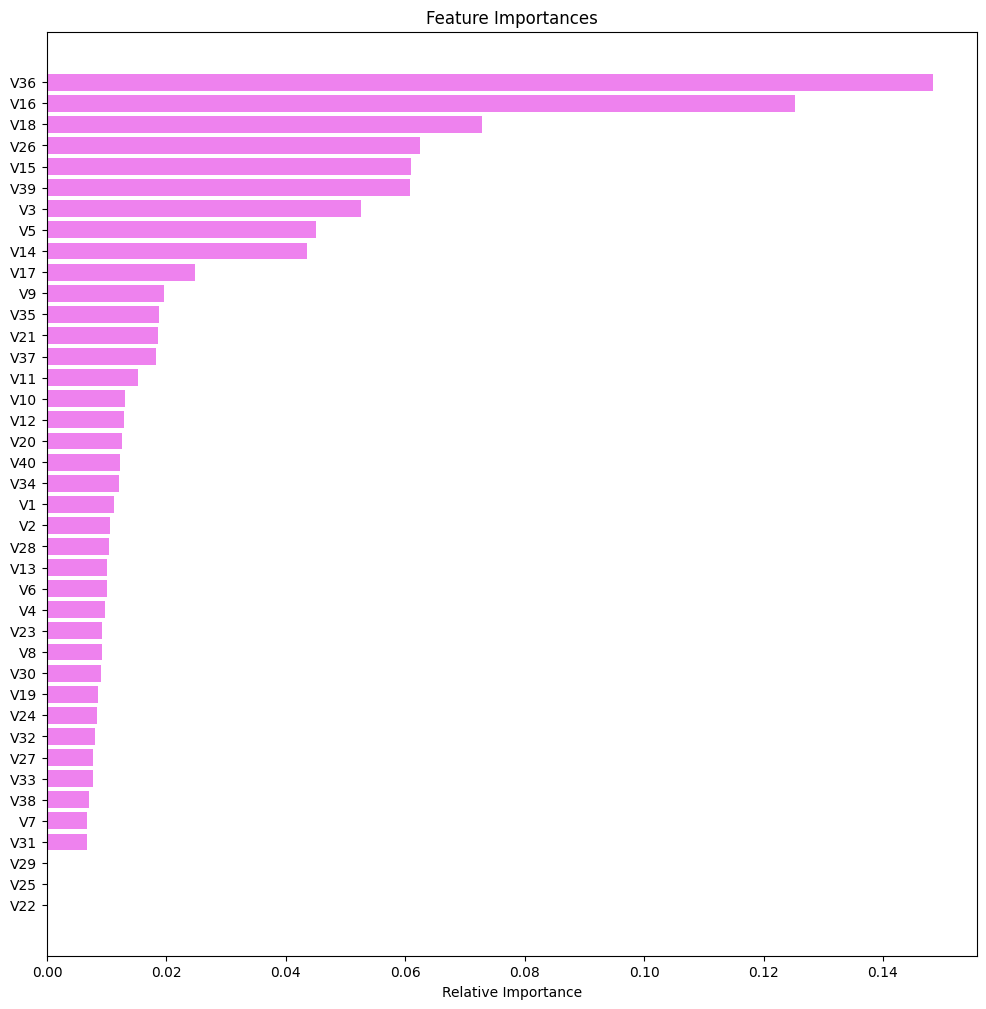

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
feature_names = X_train.columns
importances =  xgb2.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The identity of the variables are not available.<br>
Therefore, the variables will be referred to by variable number.<br>

----------------------------------

The number one contributor to issues with wind turbines is V36.<br>
The second contributor to issues with wind turbines is V16<br>
The third contributor to issues with wind turbines is V26<br>
The fourth contributor to issues with wind turbines is V18<br>
The fifth contributor to issues with wind turbines is V39<br>
The sixth contributor to issues with wind turbines is V15<br>
The seventh highest contributor to issues with wind turbines is V14.<br>
The eighth highest contributor to issues with wind turbines is V3.

----------------------------------

V17, V21, V5 and V9, in that order are all much lower contributors to prediction of failure of wind turbines than the first 8 variables listed above.

----------------------------------

There is then a step down to the third tier contributor variable numbers as shown in the above chart.


## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [112]:
# Pipeline_model = Pipeline(
#     steps=[
#         (
#             "XGB",
#             XGBClassifier(
#                 random_state=1,
#                 n_estimators=50,
#                 scale_pos_weight=10,
#                 subsample=0.8,
#                 learning_rate=0.01,
#                 gamma=0,
#                 eval_metric="logloss",
#                 reg_lambda=5,
#                 max_depth=1,
#             ),
#         ),
#     ]
# ) ## Complete the code to create pipeline for the best model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
Pipeline_model = Pipeline(
    steps=[
        (
            "Ada",
            AdaBoostClassifier(
            n_estimators=30,
            learning_rate=1,
            random_state=1,
            base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
            ),
        ),
    ]
) ## Complete the code to create pipeline for the best model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
display_arbitrary(data, rows=4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.46,-4.68,3.10,0.51,-0.22,-2.03,-2.91,0.05,-1.52,3.76,-5.71,0.74,0.98,1.42,-3.38,-3.05,0.31,2.91,2.27,4.39,-2.39,0.65,-1.19,3.13,0.67,-2.51,-0.04,0.73,-3.98,-1.07,1.67,3.06,-1.69,2.85,2.24,6.67,0.44,-2.37,2.95,-3.48,0
1,3.37,3.65,0.91,-1.37,0.33,2.36,0.73,-4.33,0.57,-0.10,1.91,-0.95,-1.26,-2.71,0.19,-4.77,-2.21,0.91,0.76,-5.83,-3.07,1.60,-1.76,1.77,-0.27,3.63,1.50,-0.59,0.78,-0.20,0.02,-1.80,3.03,-2.47,1.89,-2.30,-1.73,5.91,-0.39,0.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19998,-3.19,-10.05,5.70,-4.37,-5.35,-1.87,-3.95,0.68,-2.39,5.46,1.58,3.57,9.23,2.55,-7.04,-0.99,-9.66,1.16,3.88,3.52,-7.02,-0.13,-3.45,-4.80,-0.88,-3.81,5.42,-3.73,0.61,5.26,1.91,0.40,3.16,3.75,8.53,8.45,0.20,-7.13,4.25,-6.11,0
19999,-2.69,1.96,6.14,2.60,2.66,-4.29,-2.34,0.97,-1.03,0.50,-9.59,3.18,1.05,-1.42,-4.67,-5.41,3.72,2.89,2.33,1.46,-6.43,1.82,0.81,7.79,0.33,5.26,-4.87,-0.82,-5.67,-2.86,4.67,6.62,-1.99,-1.35,3.95,5.45,-0.46,-2.20,1.68,-1.97,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(["Target"], axis=1) ##  Complete the code to drop target variable from test data
y_test1 = df_test["Target"] ##  Complete the code to store target variable in y_test1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
display_arbitrary(Y1, rows=4)

0        0
1        0
        ..
19998    0
19999    0
Name: Target, Length: 20000, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
# We can't oversample/undersample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# We don't need to impute missing values in test set as it will be done inside pipeline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
1=2

SyntaxError: cannot assign to literal (3293032332.py, line 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Note:** Please perform either oversampling or undersampling based on the final model chosen.

If the best model is built on the oversampled data, uncomment and run the below code to perform oversampling

above not used

In [ ]:
#code for oversampling on the data
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# y_over1_as_df=y_over1.squeeze()

If the best model is built on the undersampled data, uncomment and run the below code to perform undersampling


In [ ]:
# # code for undersampling on the data
# # Under Sampling Technique
# rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
# X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Pipeline_model.fit(X_over1, y_over1) ##  Complete the code to fit the Model obtained from above step

Pipeline(steps=[('Ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=30,
                                    random_state=1))])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_test, y_test)  ## Complete the code to check the performance on test set
Pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.941,0.851,0.489,0.621


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Business Insights and Conclusions


- Best model and its performance
- Important features
- Additional points

***